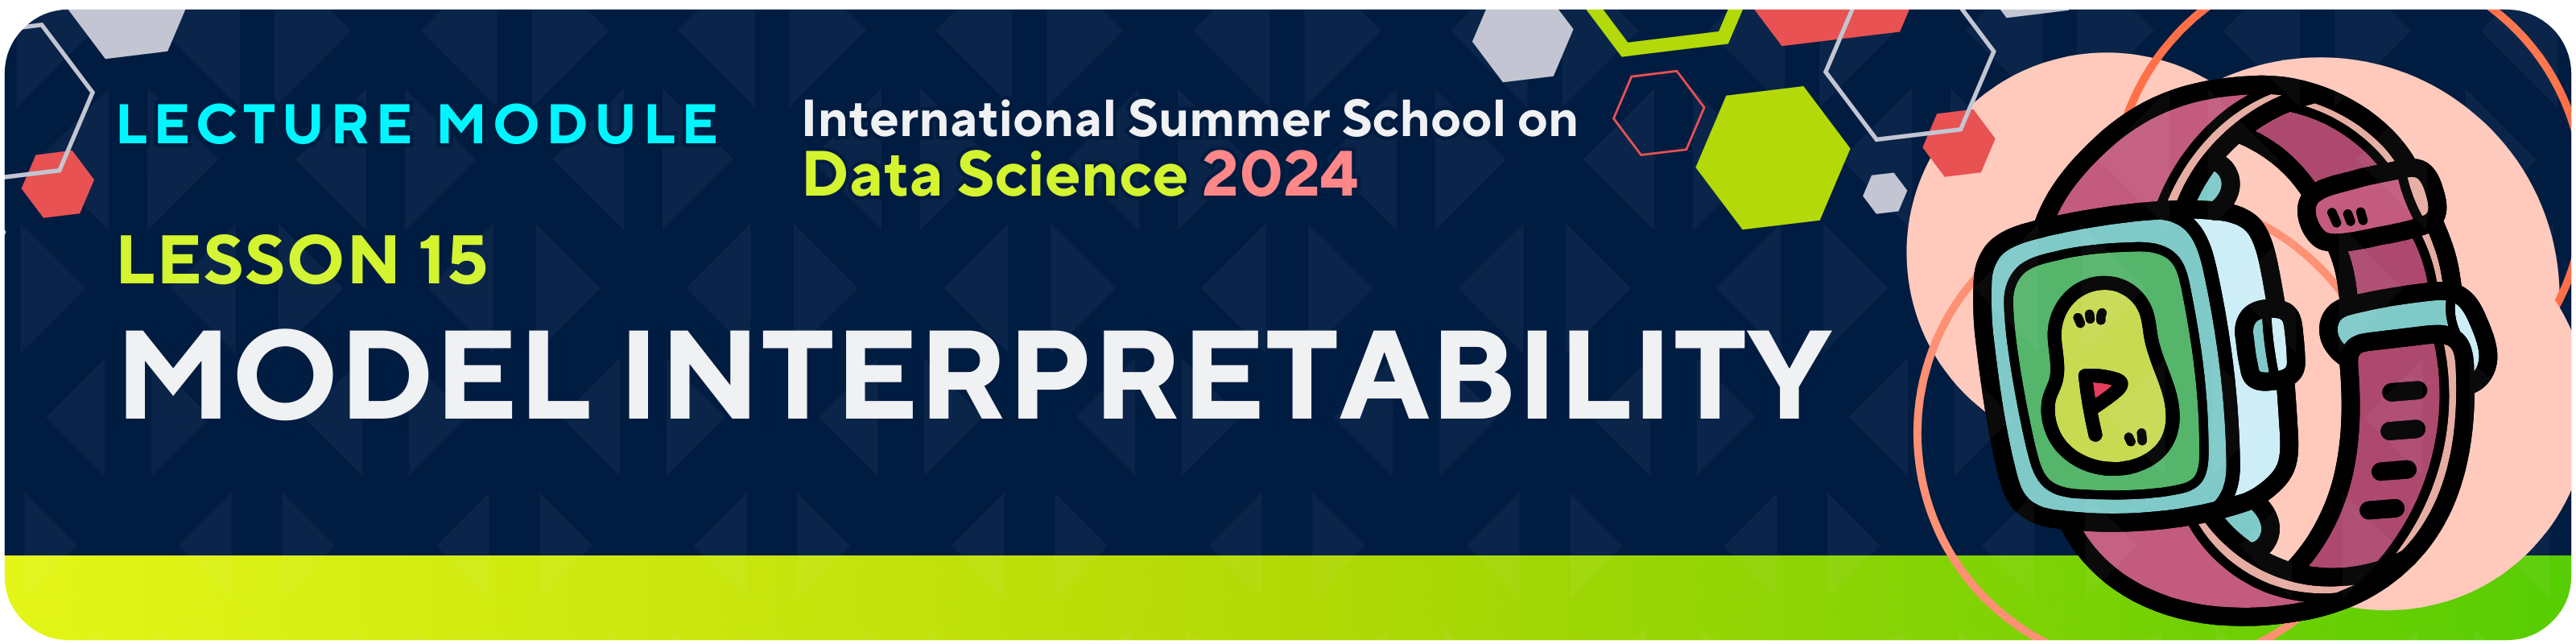

<div class='markdown-google-sans'>

## <font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**Intro To Model Interpretability**
</div>

<div class='markdown-google-sans'>

### **<font color=#819A00> About Model Interpretability**
</div>


<img src="https://i.imgur.com/vp7Vk0F.png" width=800 />

<img src="https://i.imgur.com/W1H4ZXi.png" width=800 />

<img src="https://i.imgur.com/4QS7Y22.png" width=800 />

<img src="https://i.imgur.com/byxwZV1.png" width=800 />




<div class='markdown-google-sans'>

### **<font color=#819A00>Categories of Interpretability Techniques**
</div>


<img src="https://i.imgur.com/BJwqpgZ.png" width=800 />

<img src="https://i.imgur.com/Xk0m4if.png" width=800 />

<img src="https://i.imgur.com/d9aDsoz.png" width=800 />



<div class='markdown-google-sans'>

### **<font color=#819A00>Popular Interpretability Techniques**
</div>


<img src="https://i.imgur.com/mzICFME.png" width=800 />

<img src="https://i.imgur.com/StDxNK3.png" width=800 />

<img src="https://i.imgur.com/gz6Ehdh.png" width=800 />

<div class='markdown-google-sans'>

## **15.1**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Feature Importance**
</div>


<div class='markdown-google-sans'>

### **<font color=#819A00>About Feature Importance**
</div>

<img src="https://i.imgur.com/MC2kWCE.png" width=800 />

<img src="https://i.imgur.com/PKvWS9P.png" width=800 />


<div class='markdown-google-sans'>

### 📊　Dataset & Libraries
</div>

<img src="https://i.imgur.com/ERsKMlH.png" width=800 />


In [ ]:
# Importing Necessary Libraries
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error

import numpy as np
np.set_printoptions(edgeitems=30, formatter={'float_kind': '{:.2f}'.format})

import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.width = 0

# Read Data
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Reorder the DataFrame
df = df[['sunny','overcast','rain','Temperature','Humidity','Wind','Play', 'Num_Players']]

# Set feature matrix X and target vector y for both classification
X, y_clf = df.drop(['Play','Num_Players'], axis=1).values, df['Play']
X_train, X_test, y_clf_train, y_clf_test = train_test_split(X, y_clf, train_size=0.5, shuffle=False)

# Set feature matrix X and target vector y for regression
X, y_reg = df.drop(['Play','Num_Players'], axis=1), df['Num_Players']
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, train_size=0.5, shuffle=False)

# Apply scaling to numerical columns
scaler = StandardScaler()
float_cols = X_train.select_dtypes(include=['float64']).columns
X_train[float_cols] = scaler.fit_transform(X_train[float_cols]).round(2)
X_test[float_cols] = scaler.transform(X_test[float_cols]).round(2)

print(pd.concat([X_train, y_clf_train, y_reg_train], axis=1), '\n')
print(pd.concat([X_test, y_clf_test, y_reg_test], axis=1))

    sunny  overcast  rain  Temperature  Humidity  Wind  Play  Num_Players
0       1         0     0         1.80      0.50     0     0           52
1       1         0     0         1.02      1.02     1     0           39
2       0         1     0         1.49     -0.24     0     1           43
3       0         0     1        -0.56      1.66     0     1           37
4       0         0     1        -0.88     -0.03     0     1           28
5       0         0     1        -1.35     -1.08     1     0           19
6       0         1     0        -1.51     -1.61     1     1           43
7       1         0     0        -0.25      1.55     0     0           47
8       1         0     0        -0.72     -1.08     0     1           56
9       0         0     1         0.23     -0.03     0     1           33
10      1         0     0         0.23     -1.08     1     1           49
11      0         1     0        -0.25      1.02     1     1           23
12      0         1     0         1.17

<div class='markdown-google-sans'>

### **<font color=#819A00>Intrinsic Feature Importance**
</div>

<img src="https://i.imgur.com/8eeu1H1.png" width=800 />

<div class='markdown-google-sans'>

#### **<font color=#819A00>Tree-based Models**
</div>

<img src="https://i.imgur.com/Gwes57y.png" width=800 />

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_clf_train)

# Calculate feature importance
importances = model.feature_importances_

# Print feature importance
for feature, importance in zip(X.columns, importances):
    print(f"{feature:11}: {importance:.3f}")

sunny      : 0.121
overcast   : 0.138
rain       : 0.075
Temperature: 0.249
Humidity   : 0.265
Wind       : 0.151


<div class='markdown-google-sans'>

#### **<font color=#819A00>Linear Models**
</div>

<img src="https://i.imgur.com/FhqYQtX.png" width=800 />

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_clf_train)

# Extract the logistic regression coefficients
coefficients = model.coef_[0]

# Calculate feature importance (absolute values of coefficients)
importances = np.abs(coefficients)

# Print feature importance
for feature, importance in zip(X.columns, importances):
    print(f"{feature:11}: {importance:.3f}")

sunny      : 0.541
overcast   : 0.756
rain       : 0.215
Temperature: 0.197
Humidity   : 0.442
Wind       : 0.674


<div class='markdown-google-sans'>

### **<font color=#819A00>SHAP Values**
</div>

<img src="https://i.imgur.com/DXjVebs.png" width=800 />

<img src="https://i.imgur.com/z3D33J9.png" width=800 />


<img src="https://i.imgur.com/lKy6zKn.png" width=800 />

<div class='markdown-google-sans'>

#### **<font color=#819A00>SHAP Calculation**
</div>

<img src="https://i.imgur.com/2x5XLq9.png" width=800 />

<img src="https://i.imgur.com/H1mLlZQ.png" width=800 />

In [ ]:
!pip install shap -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.2 MB/s eta 0:00:00


In [ ]:
# Importing Necessary Libraries
import shap
import pandas as pd

from sklearn.ensemble import RandomForestRegressor

# Create an XGBoost model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_reg_train)

# Calculate SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Create a DataFrame of SHAP values with the same structure as X_test
shap_df = pd.DataFrame(shap_values.values,
                       columns=X_test.columns, index=X_test.index).round(2)

# Add base values to shap_df
shap_df['base_values'] = shap_values.base_values.round(2)
print(shap_df)

    sunny  overcast  rain  Temperature  Humidity  Wind  base_values
14   5.29      0.47  3.84        -0.05     -3.40 -2.97        37.69
15  -3.32     -0.55  2.54        -0.19     -3.18  3.11        37.69
16  -3.40      0.07 -5.95        -0.10     -1.73  4.04        37.69
17   5.04      0.39  4.12        -0.67      1.32 -2.76        37.69
18   4.31      0.44  2.86        -0.20     -3.10  2.29        37.69
19  -3.72      0.05 -6.66        -0.04     -2.24 -4.22        37.69
20  -3.80     -0.41  3.82         1.26     -2.01 -3.54        37.69
21  -3.23      0.05 -5.59        -1.05     -2.45  4.20        37.69
22   4.76      0.42  4.29         0.25      2.41 -2.71        37.69
23  -3.24     -0.34  3.20         0.04      1.97  2.62        37.69
24   4.15      0.36  3.42        -1.02      2.12  1.93        37.69
25  -3.43     -0.48  3.37         0.46     -2.85 -3.52        37.69
26  -3.41      0.16 -7.01        -0.57      1.42  3.22        37.69
27  -3.11     -0.26  3.25         1.23      0.77

<img src="https://i.imgur.com/G94hl7F.png" width=800 />

<img src="https://i.imgur.com/OchCYPd.png" width=800 />

<img src="https://i.imgur.com/qwGRsJb.png" width=800 />

<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟　Feature Importance (Tree-based Models)**
</div>

In [ ]:
# Importing Necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np
import pandas as pd

# Read Data
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Reorder the DataFrame
df = df[['sunny','overcast','rain','Temperature','Humidity','Wind','Play', 'Num_Players']]

# Set feature matrix X and target vector y for both classification
X, y_clf = df.drop(['Play','Num_Players'], axis=1), df['Play']
X_train, X_test, y_clf_train, y_clf_test = train_test_split(X, y_clf, train_size=0.5, shuffle=False)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_clf_train)

# Calculate feature importance
importances = model.feature_importances_

# Print feature importance
for feature, importance in zip(X.columns, importances):
    print(f"{feature:11}: {importance:.3f}")

sunny      : 0.121
overcast   : 0.138
rain       : 0.075
Temperature: 0.249
Humidity   : 0.265
Wind       : 0.151


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟　Feature Importance (Linear Models)**
</div>

In [ ]:
# Importing Necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np
import pandas as pd

# Read Data
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Reorder the DataFrame
df = df[['sunny','overcast','rain','Temperature','Humidity','Wind','Play', 'Num_Players']]

# Set feature matrix X and target vector y for both classification
X, y_clf = df.drop(['Play','Num_Players'], axis=1), df['Play']
X_train, X_test, y_clf_train, y_clf_test = train_test_split(X, y_clf, train_size=0.5, shuffle=False)

# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_clf_train)

# Calculate feature importance
coef = model.coef_[0]
importances = np.abs(coef)

# Print feature importance
for feature, importance in zip(X.columns, importances):
    print(f"{feature:14}: {importance:.3f}")

<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟　Feature Importance (SHAP)**
</div>

In [ ]:
!pip install shap -q

In [ ]:
# Importing Necessary Libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
import numpy as np
import pandas as pd

# Read Data
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Reorder the DataFrame
df = df[['sunny','overcast','rain','Temperature','Humidity','Wind','Play', 'Num_Players']]

# Set feature matrix X and target vector y for both classification
X, y_clf = df.drop(['Play','Num_Players'], axis=1), df['Play']
X_train, X_test, y_clf_train, y_clf_test = train_test_split(X, y_clf, train_size=0.5, shuffle=False)

# Train a Random Forest model
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_clf_train)

# Calculate SHAP values
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_train)

# Calculate global feature importance using SHAP values
importances = np.abs(shap_values).mean(axis=0)

# Print feature importance
for feature, importance in zip(X.columns, importances):
    print(f"{feature:14}: {importance:.3f}")

sunny      : 3.499
overcast   : 0.564
rain       : 2.775
Temperature: 0.404
Humidity   : 3.561
Wind       : 2.926


<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 15-1**
</div>

Using the following dataset, explain the feature importance using split importance (XGBoost is a Tree-based Model) and SHAP values.

In [ ]:
!pip install shap -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.9 MB/s eta 0:00:00


In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error


practice_dataset_url = "https://www.dropbox.com/scl/fi/p0n2vdwbve761sfoxrgf3/golf_dataset_mini_with_testset_practice.csv?rlkey=1r1mw6w9fhtxwijejbns1yknt&dl=0&raw=1"
df = pd.read_csv(practice_dataset_url)
X = df.copy()
target_col = 'Play'

X_train, y_train = df.drop(columns=target_col)[:-10], df[target_col][:-10]

# Create a simple model
model = XGBClassifier(random_state=42)

# Fit the pipeline
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Split Importance
# Calculate feature importance
importances = model.feature_importances_

# Print feature importance
for feature, importance in zip(X.columns, importances):
    print(f"{feature:11}: {importance:.3f}")

In [ ]:
# Global SHAP Values
# Calculate SHAP values
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_train)

# Calculate global feature importance using SHAP values
importances = np.abs(shap_values).mean(axis=0)

# Print feature importance
for feature, importance in zip(X.columns, importances):
    print(f"{feature:14}: {importance:.3f}")

DaytimeDuration: 0.260
SunshineDuration: 0.155
Temperature   : 0.534
Humidity      : 0.913
RainfallAmount: 0.991
LightningStrikes: 0.167
Outlook_Overcast: 0.000
Outlook_Rainy : 0.000
Outlook_Snowy : 0.178
Outlook_Sunny : 0.000


---
---

<div class='markdown-google-sans'>

## **15.2**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**SHAP Visualization**
</div>


<div class='markdown-google-sans'>

### **<font color=#819A00>Visualization in SHAP (Tabular Data)**
</div>

<img src="https://i.imgur.com/i7jBcoX.png" width=800 />


<div class='markdown-google-sans'>

### 📊　Dataset & Libraries
</div>

<img src="https://i.imgur.com/xHZjnhh.png" width=800 />

<img src="https://i.imgur.com/tP0pgCX.png" width=800 />

In [ ]:
# Importing Necessary Libraries
import shap
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

# Read Data
dataset_url = "https://www.dropbox.com/scl/fi/epzqcezix48lmrubb29sh/golf_dataset_mini_classification_and_regression.csv?rlkey=mjn6dfb67iiqsxhyfv3y3js0v&dl=0&raw=1"
df = pd.read_csv(dataset_url)
df = df[['sunny','overcast','rain','Temperature','Humidity','Wind','Play', 'Num_Players']]

# Set feature matrix X and target vector y for regression
X, y_reg = df.drop(['Play','Num_Players'], axis=1), df['Num_Players']
X_train, X_test, y_reg_train, y_reg_test = train_test_split(X, y_reg, train_size=0.5, shuffle=False)

# Create an XGBoost model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_reg_train)

# Calculate SHAP values
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Create a DataFrame of SHAP values with the same structure as X_test
shap_df = pd.DataFrame(shap_values.values,
                       columns=X_test.columns, index=X_test.index).round(2)

# Add base values to shap_df
shap_df['base_values'] = shap_values.base_values.round(2)
print(shap_df)

    sunny  overcast  rain  Temperature  Humidity  Wind  base_values
14   5.29      0.47  3.84        -0.05     -3.40 -2.97        37.69
15  -3.32     -0.55  2.54        -0.19     -3.18  3.11        37.69
16  -3.41      0.07 -5.95        -0.12     -1.83  4.13        37.69
17   5.15      0.39  4.12        -0.78      1.31 -2.76        37.69
18   4.34      0.45  2.86        -0.25     -3.09  2.29        37.69
19  -3.72      0.05 -6.66        -0.04     -2.24 -4.22        37.69
20  -3.86     -0.41  3.82         1.24     -2.29 -3.62        37.69
21  -3.23      0.05 -5.59        -1.05     -2.45  4.20        37.69
22   4.76      0.42  4.29         0.25      2.41 -2.71        37.69
23  -3.27     -0.35  3.21         0.10      2.07  2.62        37.69
24   4.15      0.36  3.42        -1.02      2.12  1.93        37.69
25  -3.35     -0.46  3.35         0.33     -2.85 -3.52        37.69
26  -3.40      0.16 -7.03        -0.56      1.48  3.22        37.69
27  -3.12     -0.25  3.17         0.67      0.74

<div class='markdown-google-sans'>

#### **<font color=#819A00>Global Importance**
</div>

<img src="https://i.imgur.com/h359EGE.png" width=800 />

<div class='markdown-google-sans'>

##### **<font color=#819A00>Summary Plots**
</div>

<img src="https://i.imgur.com/TIgt6Ke.png" width=800 />

<img src="https://i.imgur.com/C39DDDb.png" width=800 />

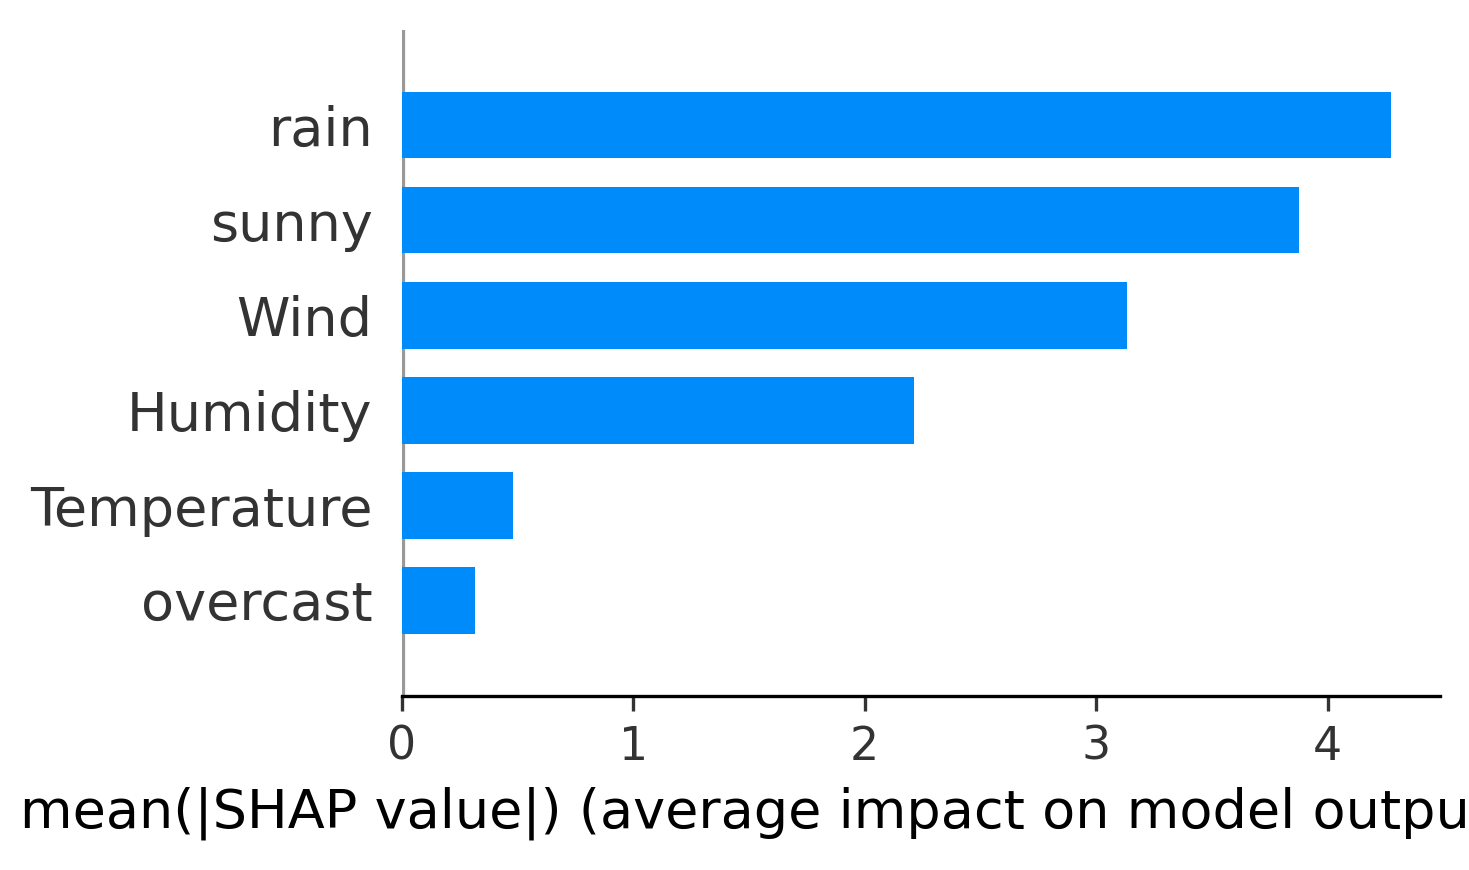

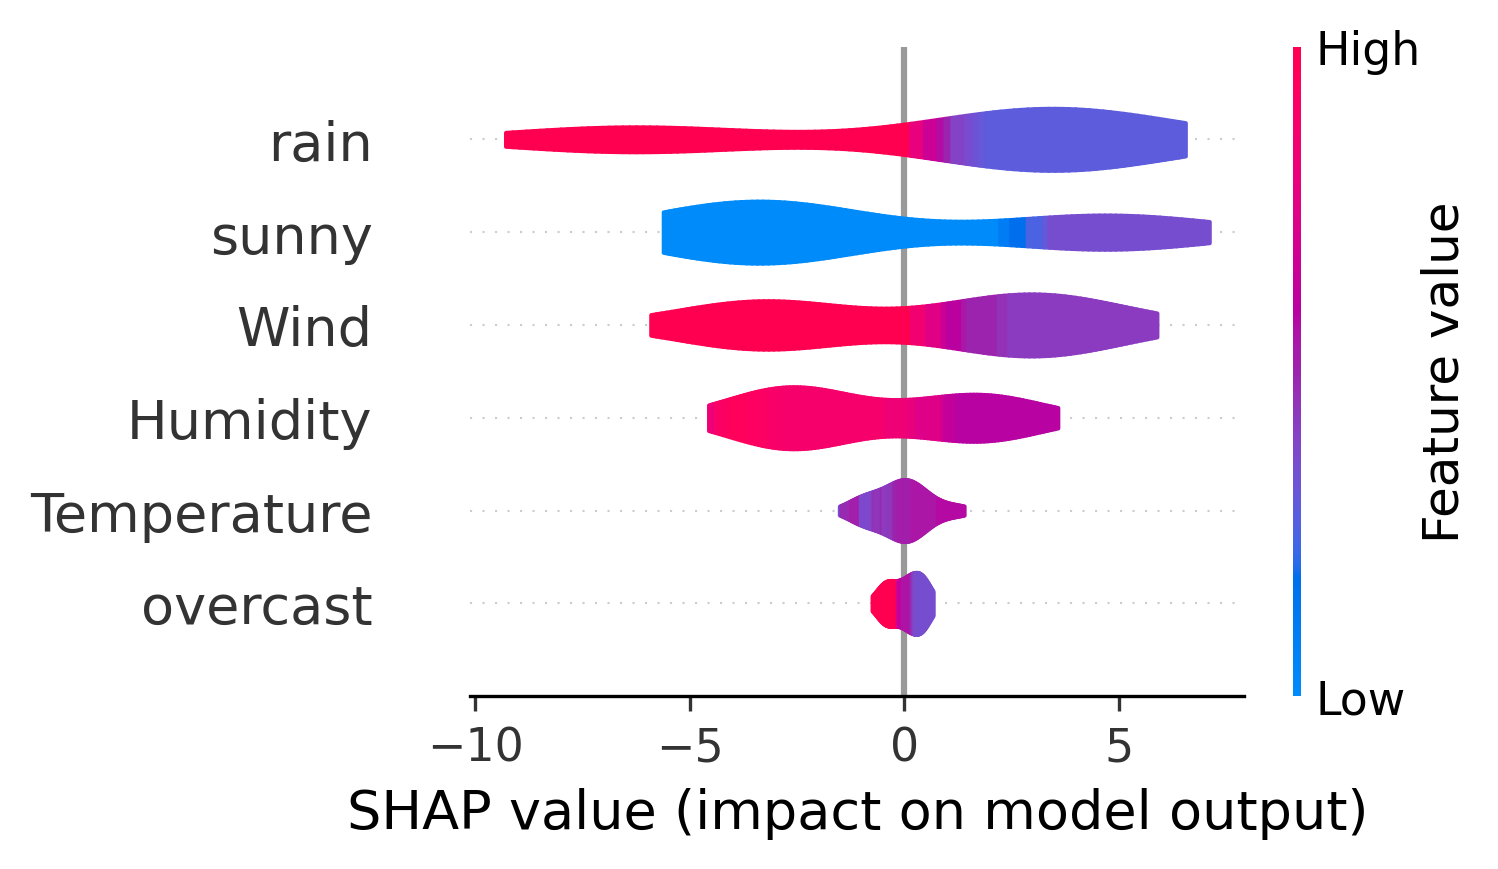

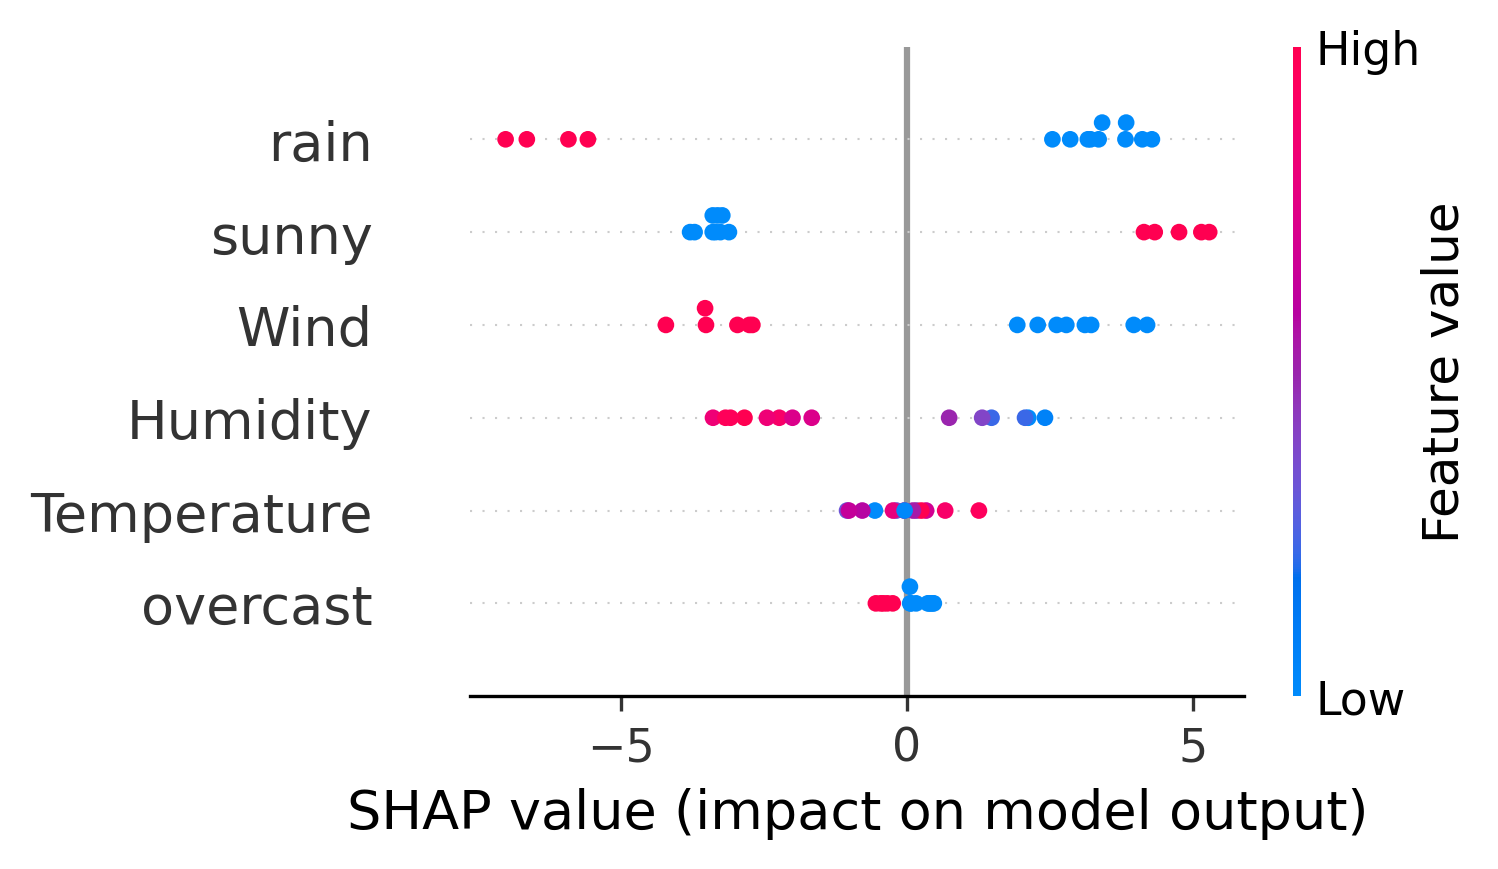

In [ ]:
# Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="bar", plot_size=(5,3))
shap.summary_plot(shap_values, X_test, plot_type="violin", plot_size=(5,3))
shap.summary_plot(shap_values, X_test, plot_type="dot", plot_size=(5,3))

<div class='markdown-google-sans'>

#### **<font color=#819A00>Local Explanation**
</div>

<img src="https://i.imgur.com/InlR7Rw.png" width=800 />

<div class='markdown-google-sans'>

##### **<font color=#819A00>Force Plot**
</div>

<img src="https://i.imgur.com/ftwX7jy.png" width=800 />

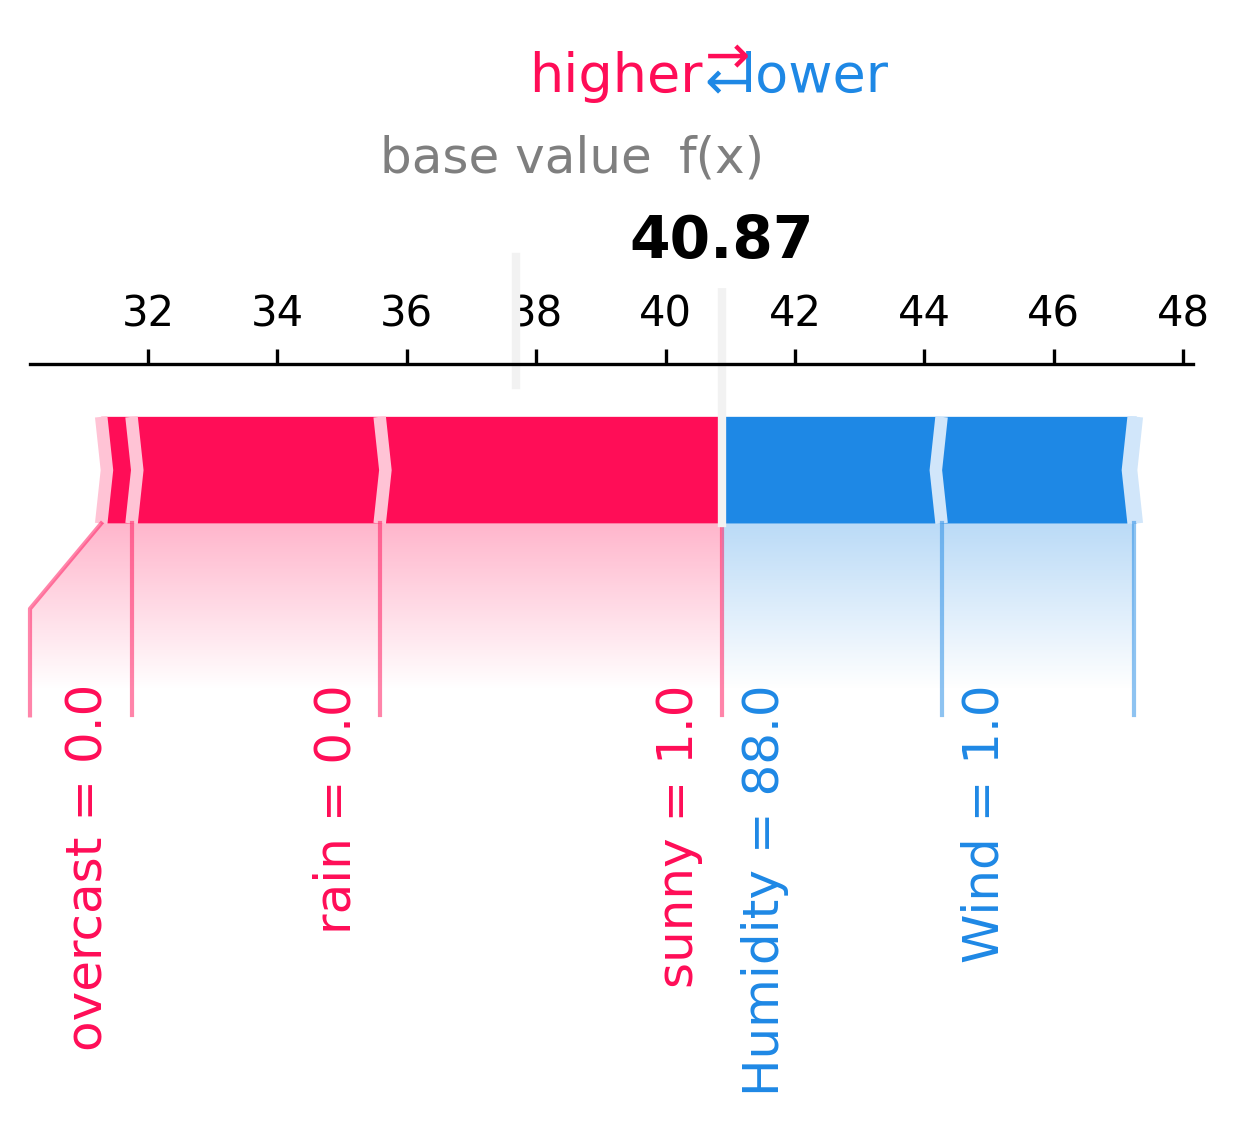

In [ ]:
# Check for ID 0
shap.plots.force(shap_values[0], figsize=(5, 3), text_rotation=90, matplotlib=True)

<div class='markdown-google-sans'>

##### **<font color=#819A00>Decision Plot**
</div>

<img src="https://i.imgur.com/QMyyX1C.png" width=800 />

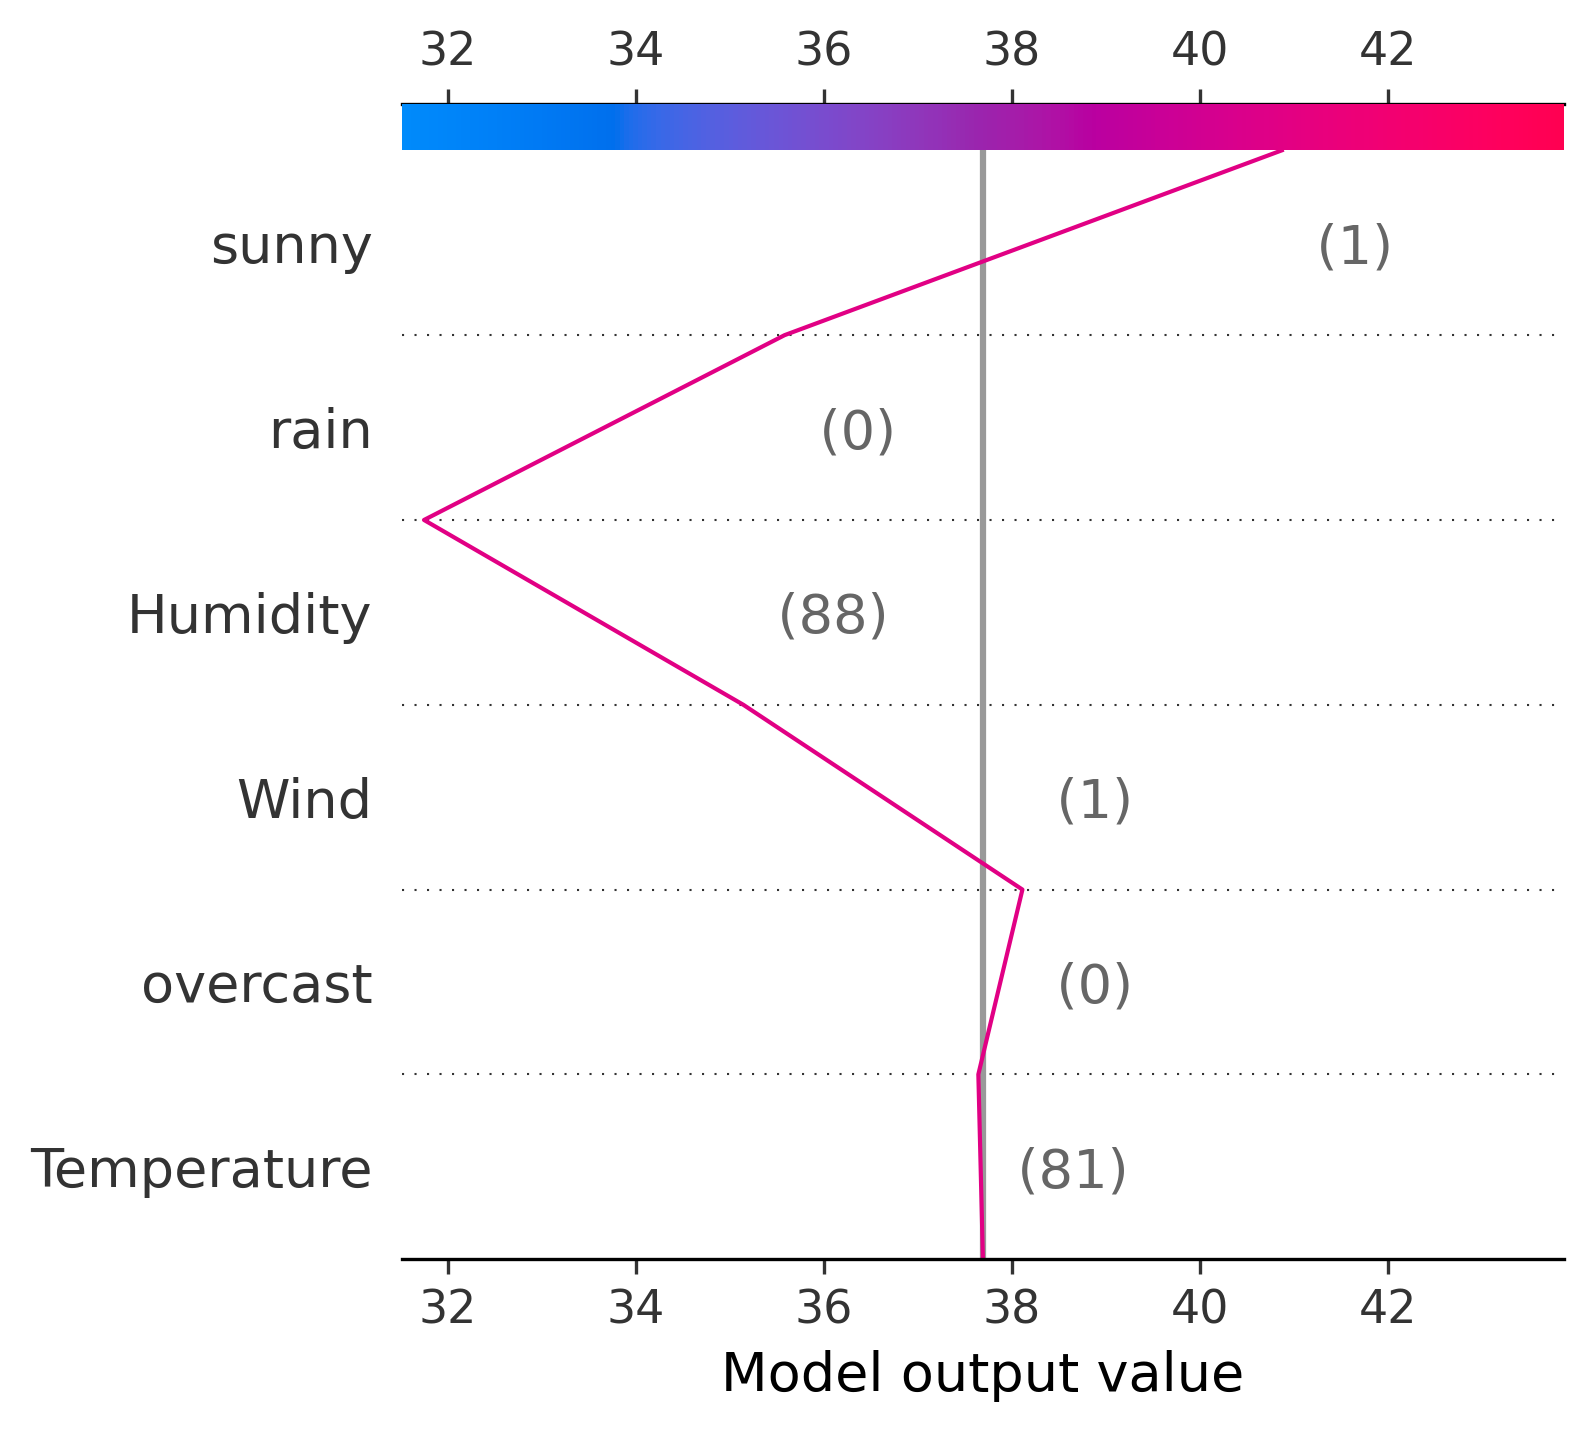

In [ ]:
# Check for ID 0
plt.figure(figsize=(5, 5))
shap.decision_plot(explainer.expected_value[0],
                   explainer.shap_values(X_test)[0],
                   X_test,
                   auto_size_plot=False)

<div class='markdown-google-sans'>

##### **<font color=#819A00>Waterfall Plot**
</div>

<img src="https://i.imgur.com/J1LK0HL.png" width=800 />

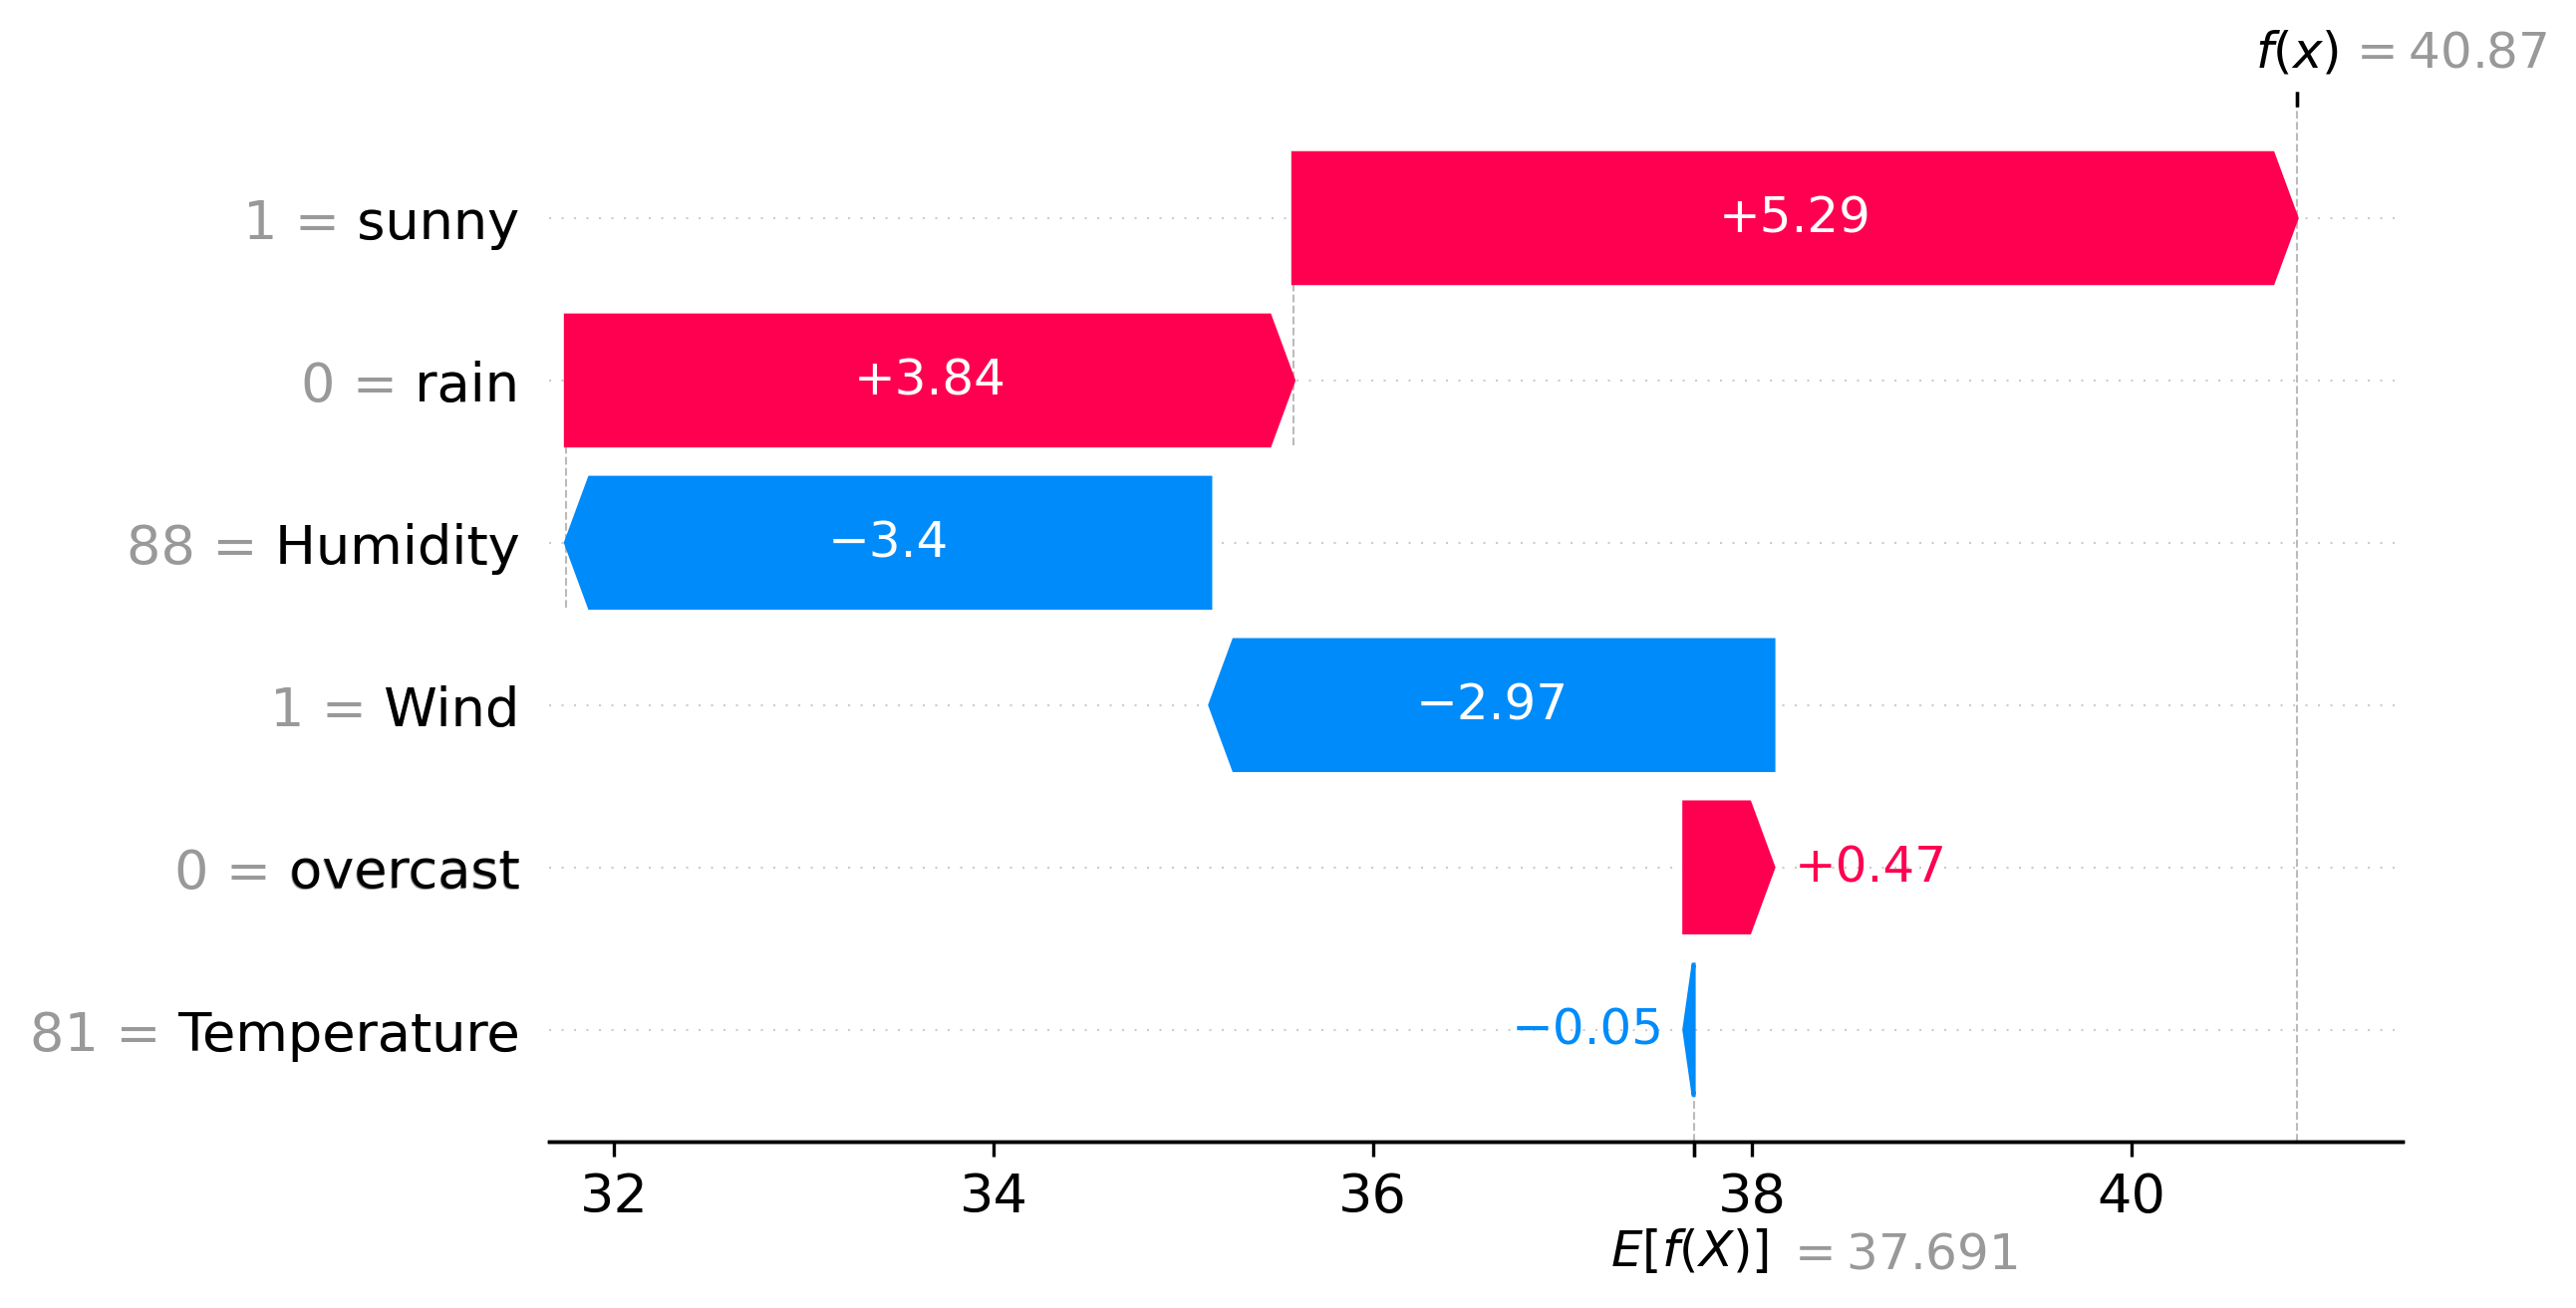

In [ ]:
# Check for ID 0
shap.plots.waterfall(shap_values[0])

<div class='markdown-google-sans'>

#### **<font color=#819A00>Feature Interaction**
</div>

<img src="https://i.imgur.com/9JXAs7g.png" width=800 />

<div class='markdown-google-sans'>

##### **<font color=#819A00>Dependence Plots**
</div>

<img src="https://i.imgur.com/FJLH9WV.png" width=800 />



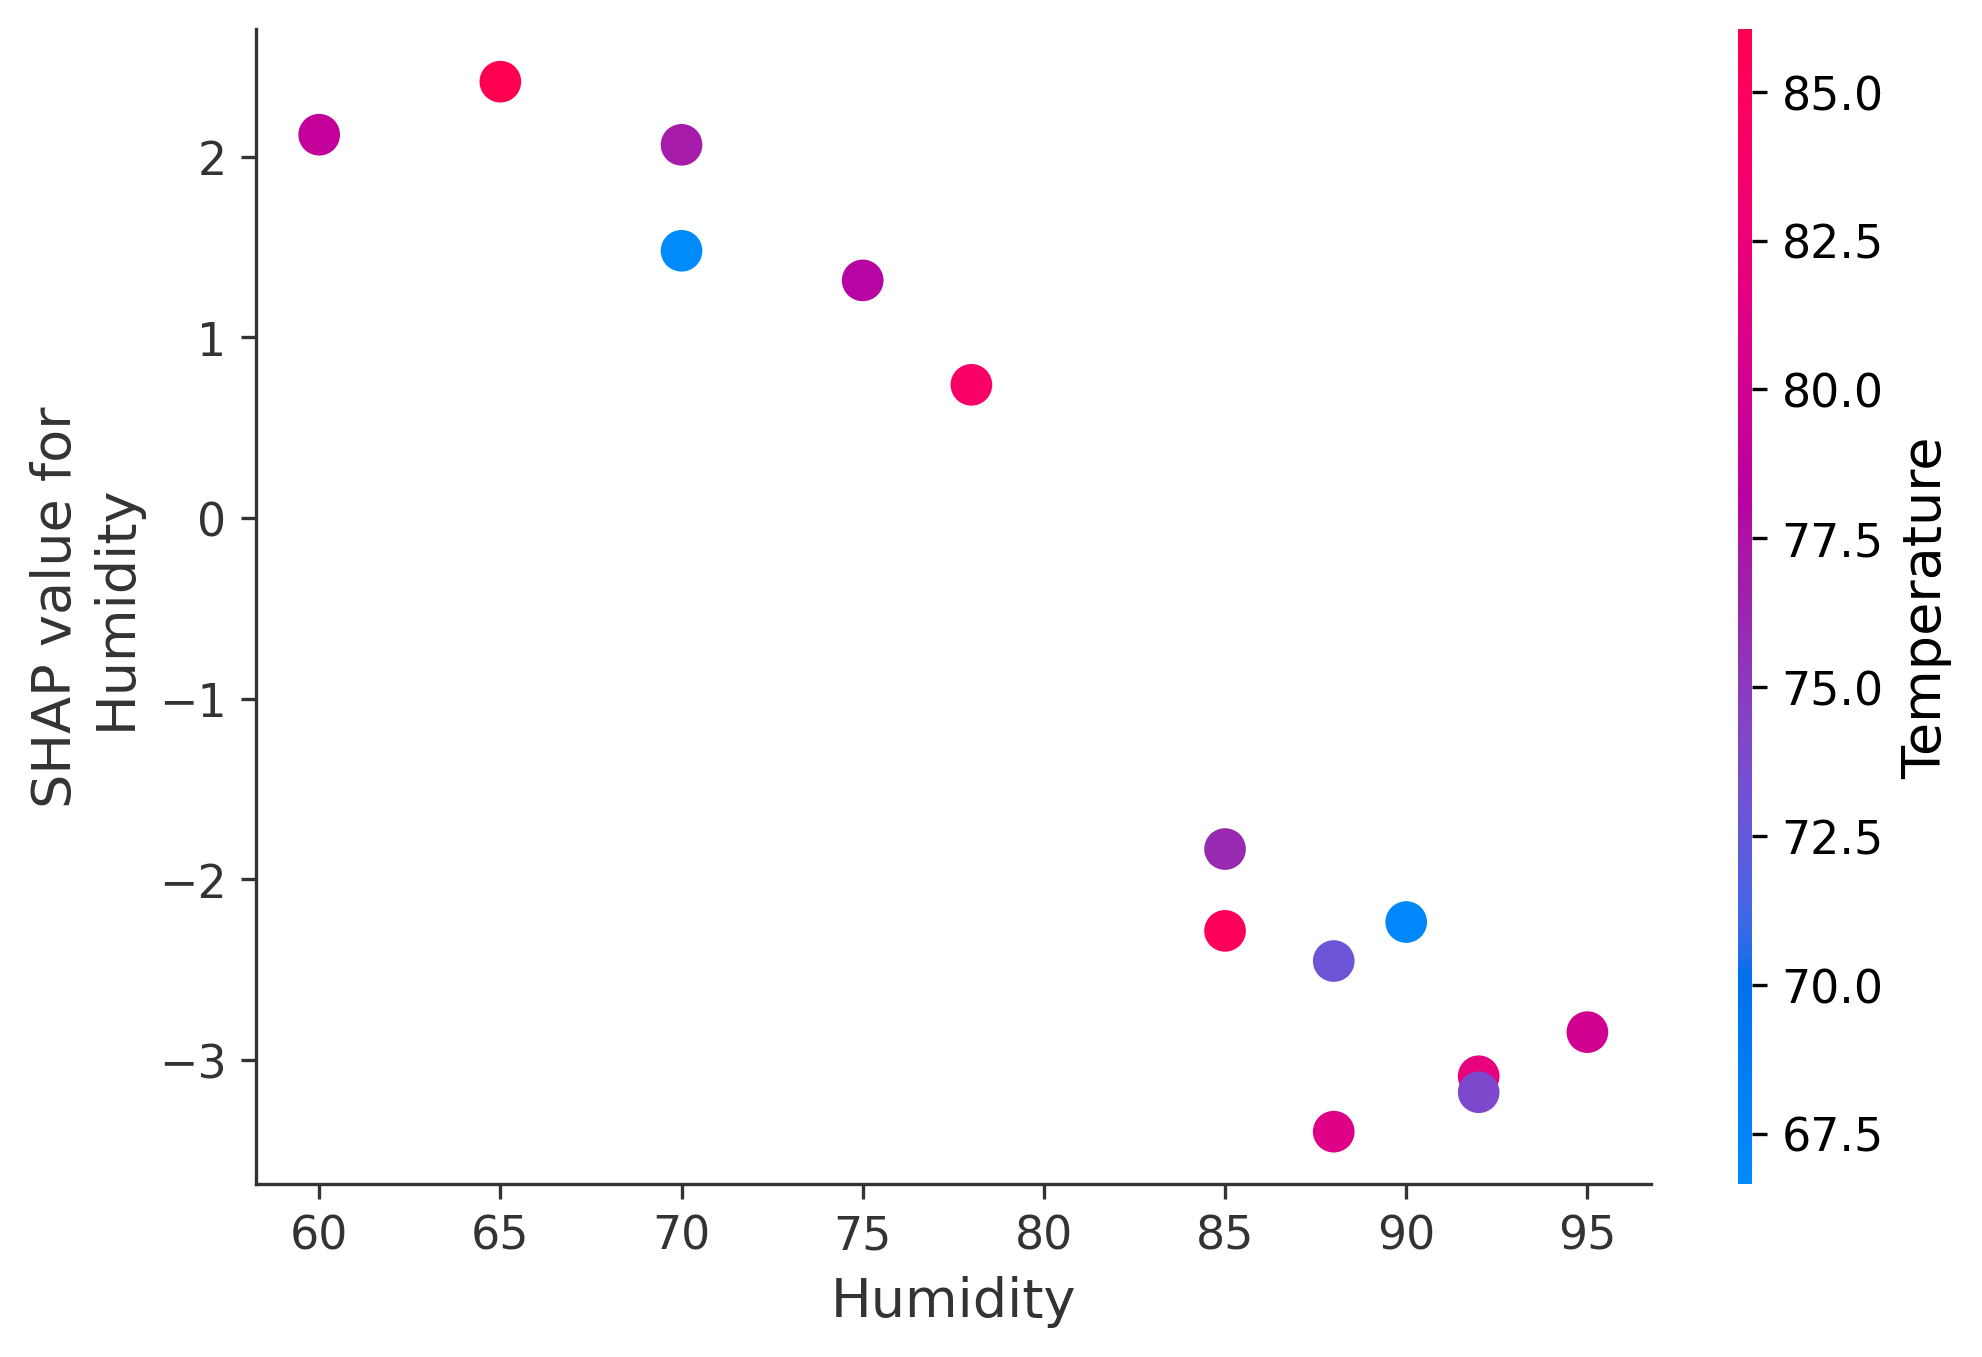

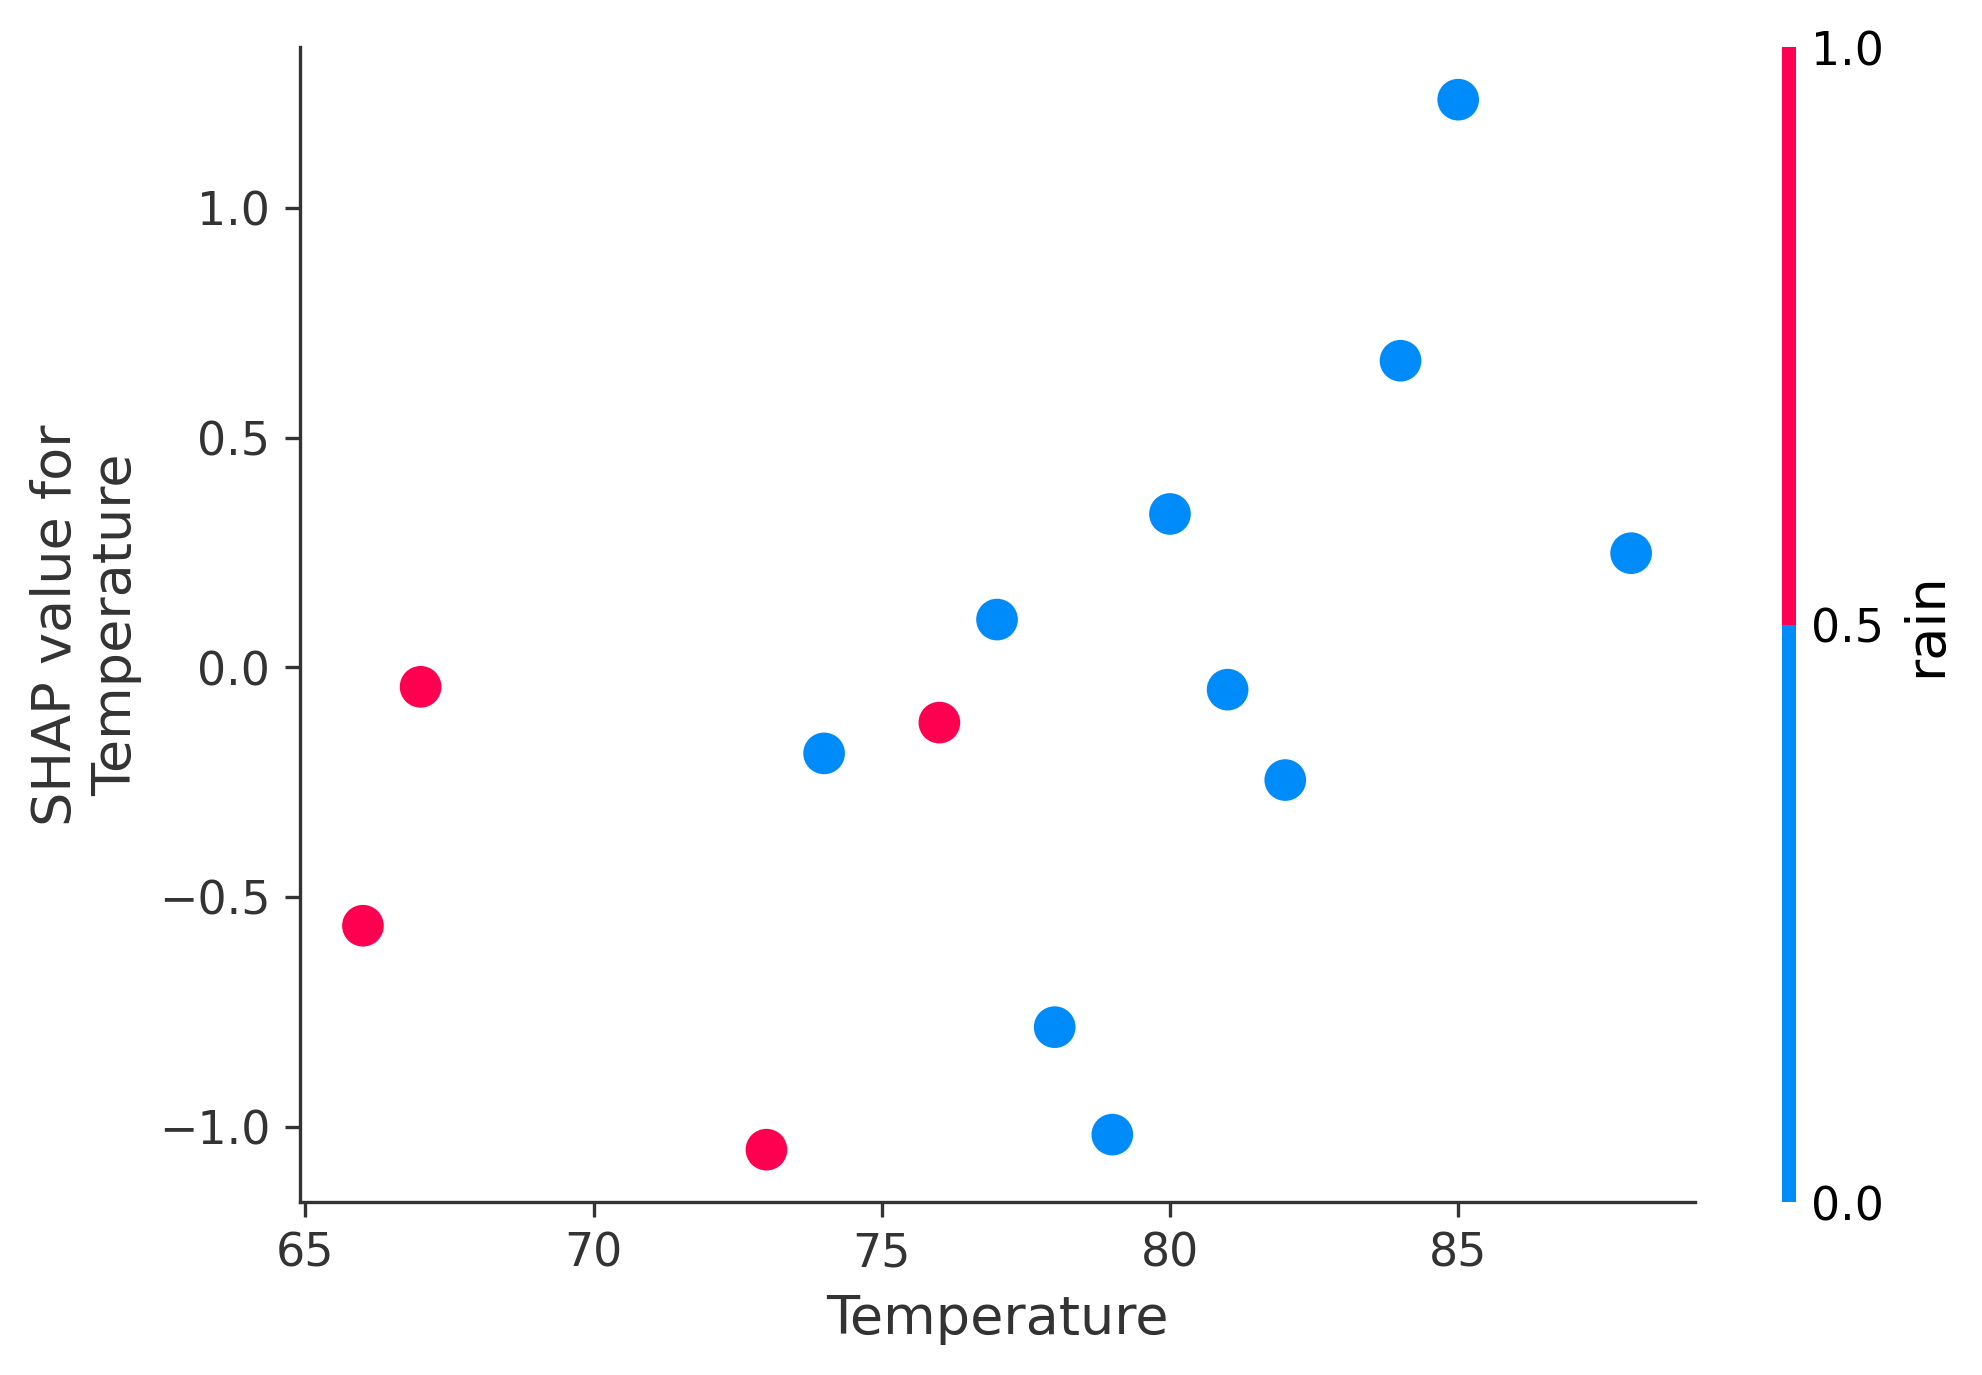

In [ ]:
shap.dependence_plot('Humidity',
                     explainer.shap_values(X_test),
                     X_test, dot_size=100,
                     interaction_index='Temperature')
shap.dependence_plot('Temperature',
                     explainer.shap_values(X_test),
                     X_test, dot_size=100,
                     interaction_index='rain')

<div class='markdown-google-sans'>

##### **<font color=#819A00>Partial Dependence Plot**
</div>

<img src="https://i.imgur.com/zxvM6p0.png" width=800 />


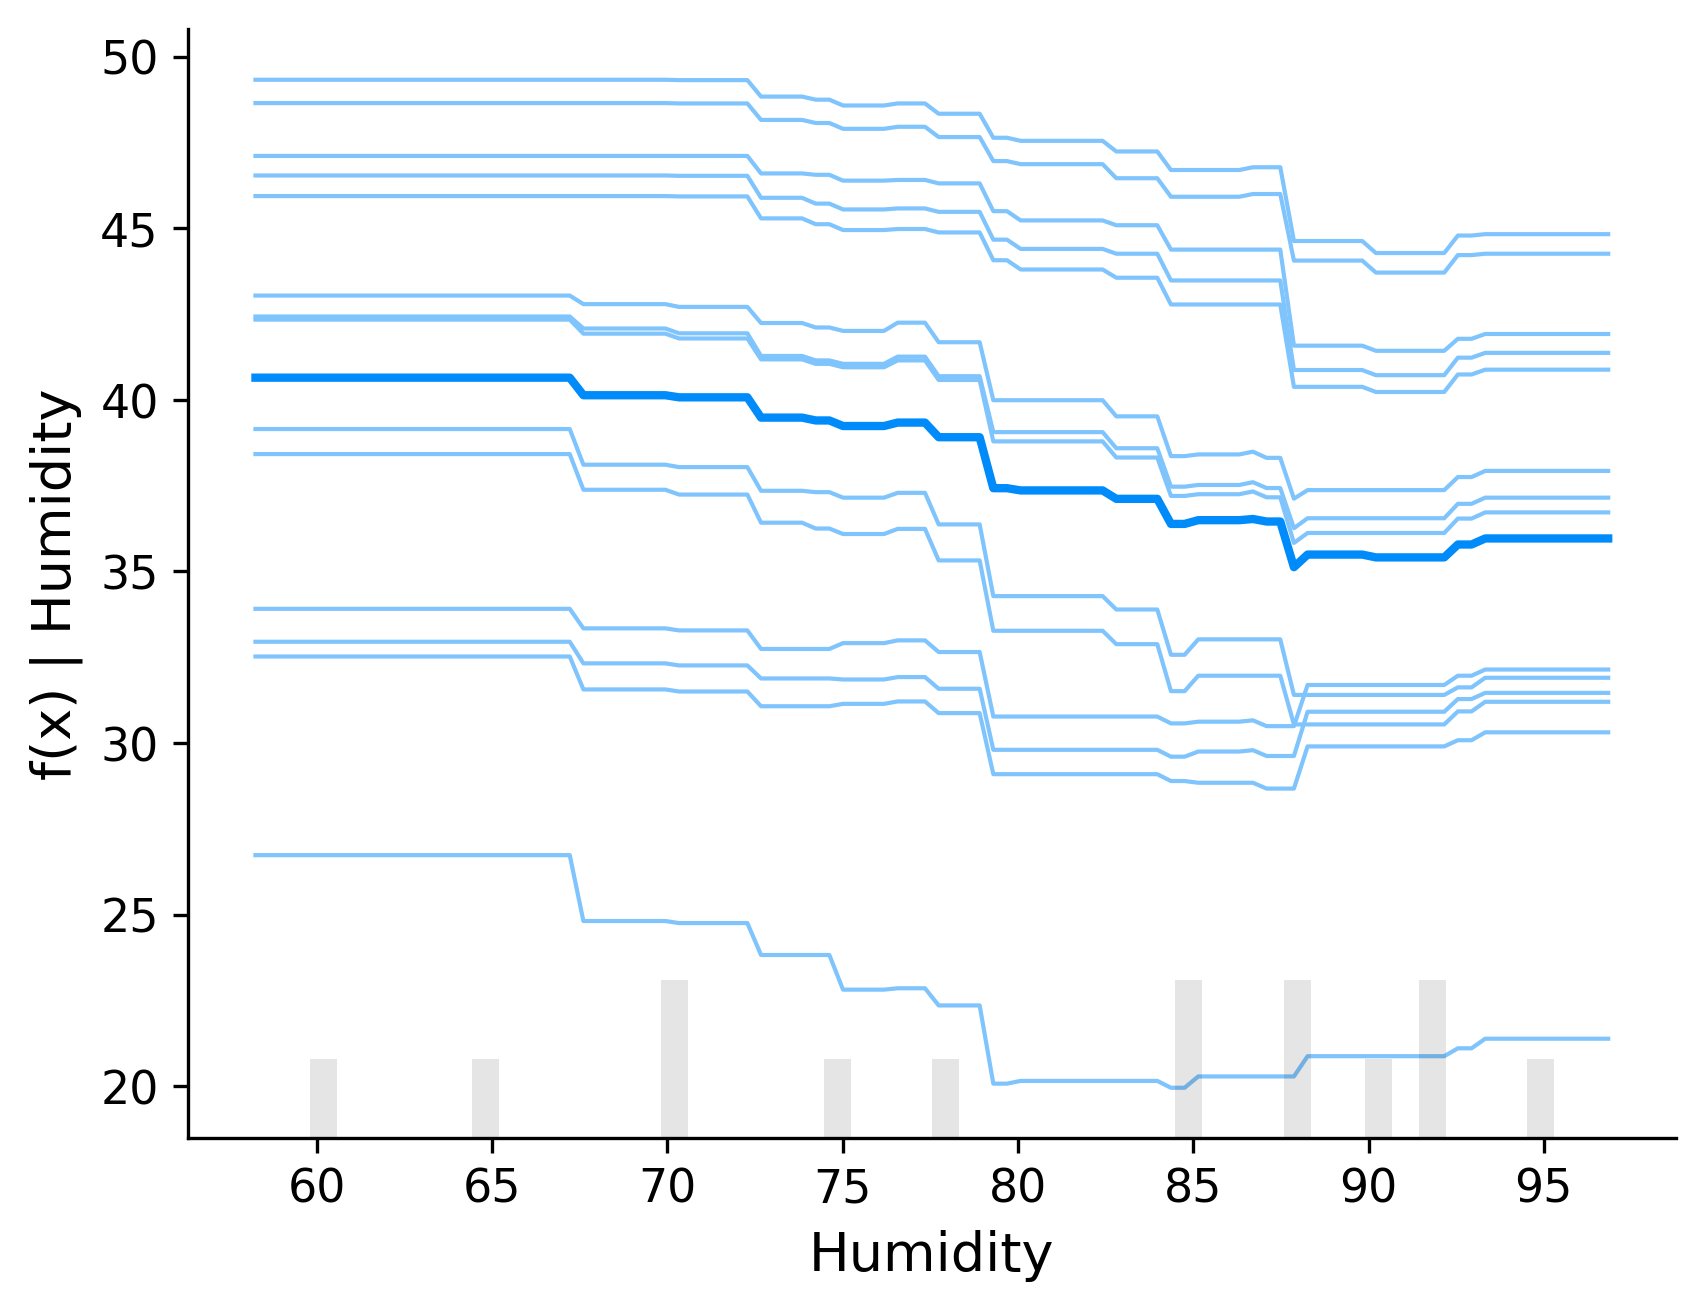

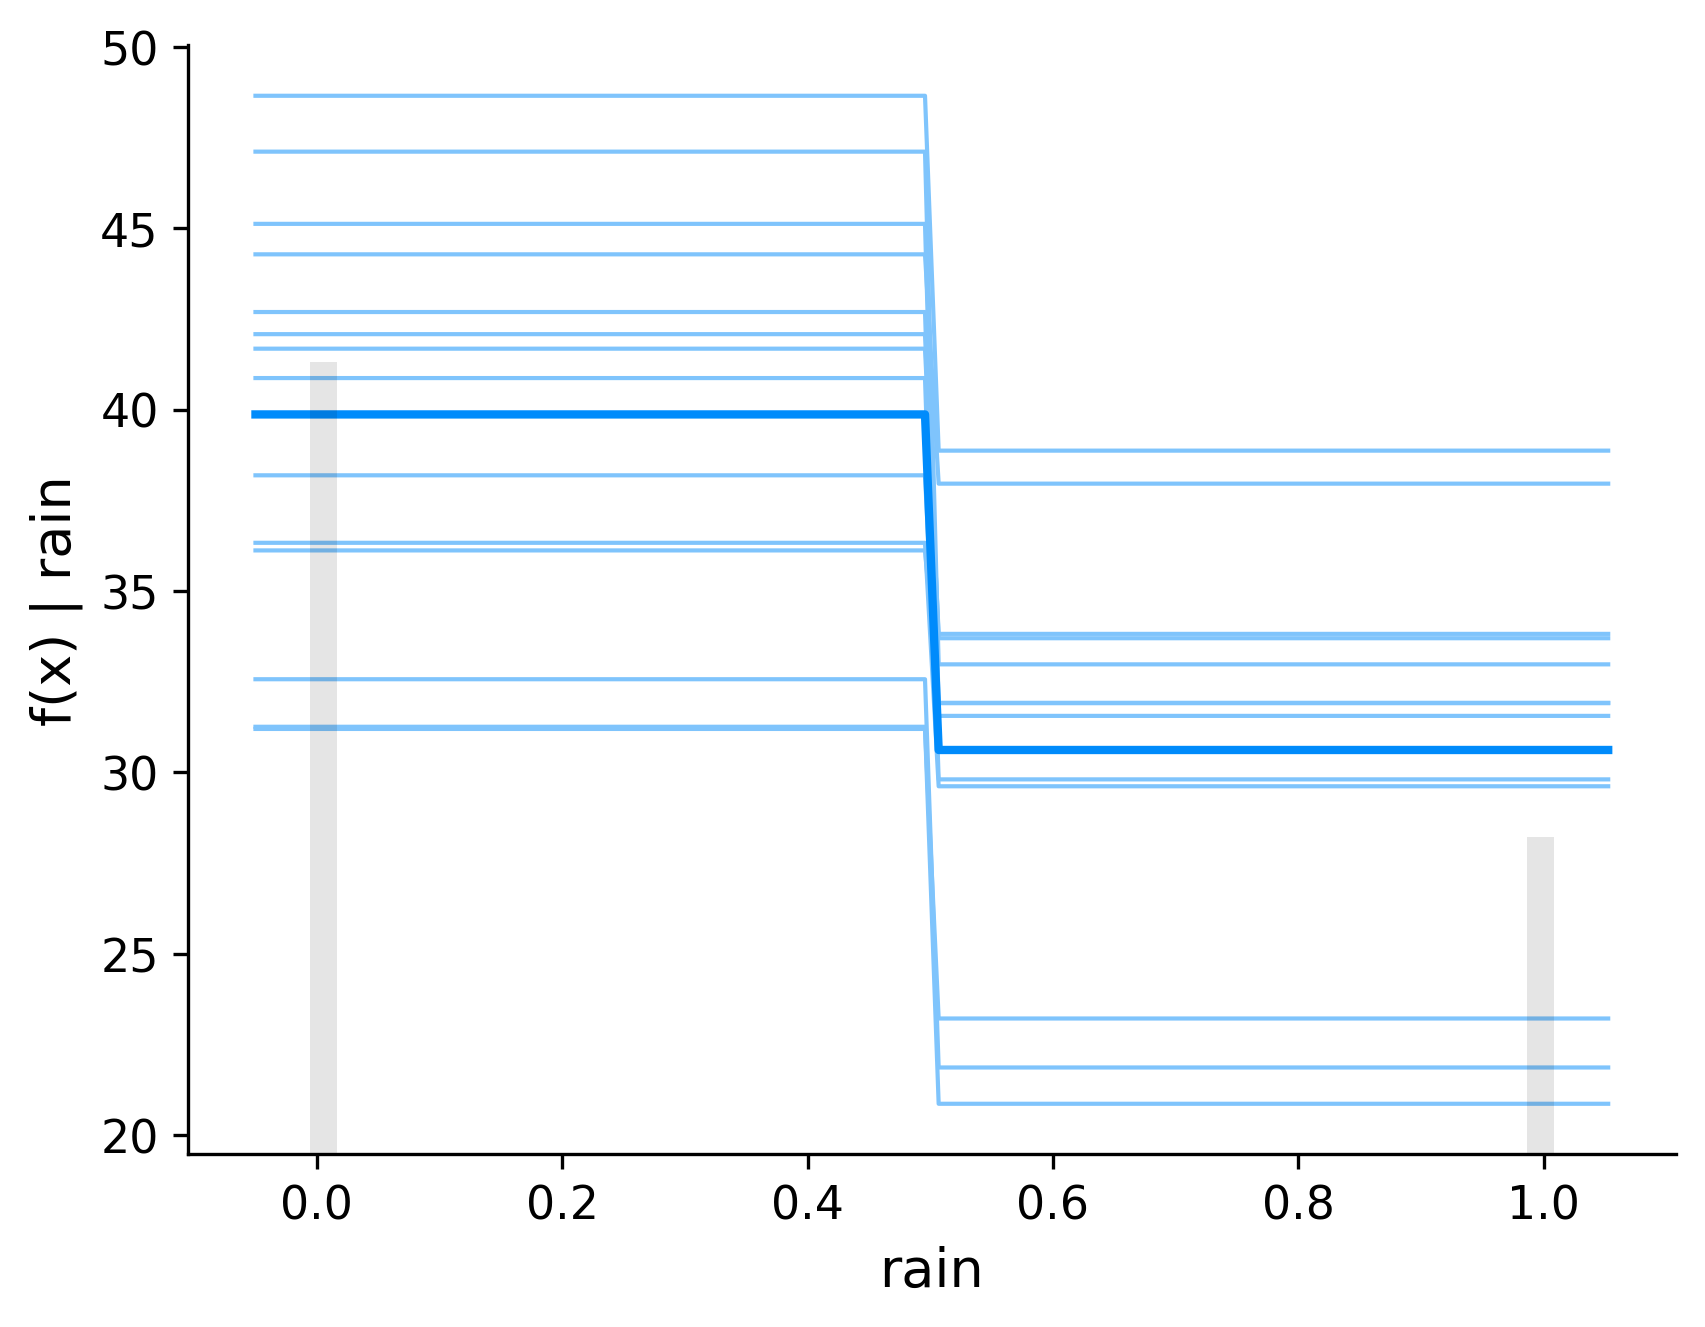

In [ ]:
shap.partial_dependence_plot('Humidity', model.predict, X_test)
shap.partial_dependence_plot('rain', model.predict, X_test)

<div class='markdown-google-sans'>

### **<font color=#819A00>Visualization in SHAP (Image Data)**
</div>

<img src="https://i.imgur.com/k2zBUeh.png" width=800 />

<img src="https://i.imgur.com/1YYvBDv.png" width=800 />

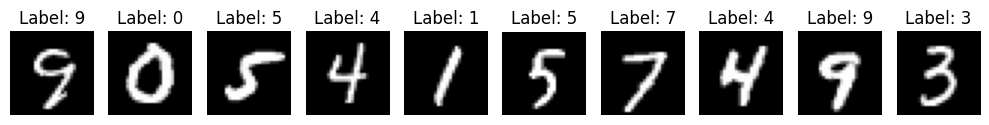

Epoch 1/5
750/750 [==============================] - 54s 67ms/step - loss: 0.2836 - accuracy: 0.9117 - val_loss: 0.0622 - val_accuracy: 0.9824
Epoch 2/5
750/750 [==============================] - 42s 56ms/step - loss: 0.0917 - accuracy: 0.9730 - val_loss: 0.0491 - val_accuracy: 0.9858
Epoch 3/5
750/750 [==============================] - 43s 57ms/step - loss: 0.0672 - accuracy: 0.9805 - val_loss: 0.0433 - val_accuracy: 0.9879
Epoch 4/5
750/750 [==============================] - 42s 57ms/step - loss: 0.0558 - accuracy: 0.9833 - val_loss: 0.0428 - val_accuracy: 0.9893
Epoch 5/5
750/750 [==============================] - 42s 57ms/step - loss: 0.0482 - accuracy: 0.9854 - val_loss: 0.0368 - val_accuracy: 0.9905


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Data Preparation
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train.astype('float32') / 255.0, X_test.astype('float32') / 255.0

# Visualization function remains the same
def visualize_samples(X, y, n_to_show=10):
    indices = np.random.choice(range(len(X)), n_to_show)
    fig, axes = plt.subplots(1, n_to_show, figsize=(10, 3))
    for i, idx in enumerate(indices):
        axes[i].imshow(X[idx], cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f'Label: {y[idx]}')  # Changed this line
    plt.tight_layout()
    plt.show()

visualize_samples(X_train, y_train)

# Model Creation and Training
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train.reshape(-1, 28, 28, 1), y_train, epochs=5, batch_size=64, validation_split=0.2, verbose=1)

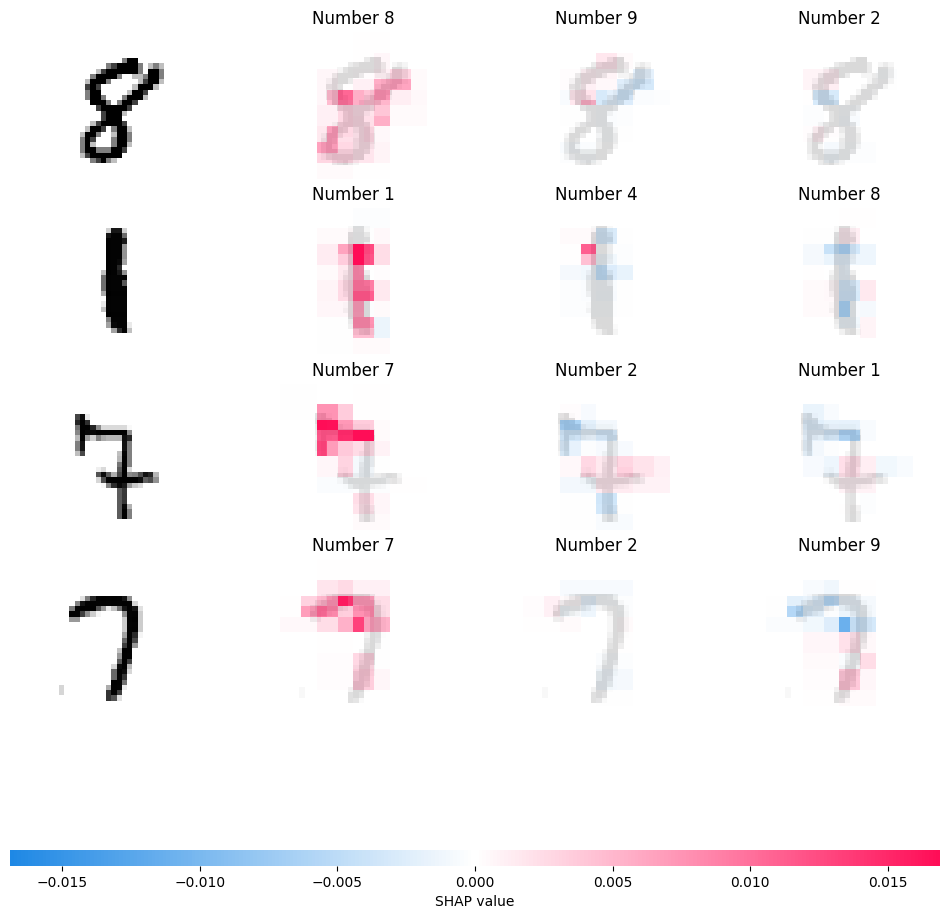

1/1 [==============================] - 0s 36ms/step
Sample 1: Predicted 8, Actual 0
Sample 2: Predicted 1, Actual 0
Sample 3: Predicted 7, Actual 0
Sample 4: Predicted 7, Actual 0


In [ ]:
import shap

# Prepare data to explain
explain_size = 4  # Increased to show multiple examples
explain_indices = np.random.choice(X_test.shape[0], explain_size, replace=False)
X_explain = X_test[explain_indices].reshape(-1, 28, 28, 1)

# Define class names for MNIST
class_names = [f'Number {i}' for i in range(10)]

# Function to get model output
def f(x):
    tmp = x.copy()
    return model(tmp)

# Function to explain the model's predictions
def explain_model(model, X_explain):

    # Define a masker
    masker = shap.maskers.Image("blur(10,10)", X_explain[0].shape) # 'inpaint_telea'

    # Create an explainer with model and image masker
    explainer = shap.Explainer(f, masker, output_names=class_names)

    # Compute SHAP values
    shap_values = explainer(X_explain, max_evals=500, batch_size=50,
                            outputs=shap.Explanation.argsort.flip[:3])

    return shap_values

# Get SHAP values
shap_values = explain_model(model, X_explain)

# Visualize SHAP values
shap.image_plot(shap_values, -X_explain)

# Print predicted and actual labels
predictions = model.predict(X_explain)
for i in range(explain_size):
    predicted_label = np.argmax(predictions[i])
    actual_label = np.argmax(y_test[explain_indices[i]])
    print(f"Sample {i+1}: Predicted {predicted_label}, Actual {actual_label}")

<div class='markdown-google-sans'>

### **<font color=#819A00>Visualization in SHAP (Text Data)**
</div>

<img src="https://i.imgur.com/6vlEIlw.png" width=800 />

In [ ]:
!pip uninstall pyarrow -y
!pip install datasets -q
!pip install shap -q

Found existing installation: pyarrow 14.0.2
Uninstalling pyarrow-14.0.2:
  Successfully uninstalled pyarrow-14.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but y

In [ ]:
# Training Need GPU
import datasets
import numpy as np
import transformers

dataset = datasets.load_dataset("imdb", split="test")

# shorten the strings to fit into the pipeline model
short_data = [v[:500] for v in dataset["text"][:10]]

classifier = transformers.pipeline("sentiment-analysis", return_all_scores=True)
classifier(short_data[:2])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


[[{'label': 'NEGATIVE', 'score': 0.07582098245620728},
  {'label': 'POSITIVE', 'score': 0.924178957939148}],
 [{'label': 'NEGATIVE', 'score': 0.018342554569244385},
  {'label': 'POSITIVE', 'score': 0.9816573858261108}]]

In [ ]:
import shap
# define the explainer
explainer = shap.Explainer(classifier)
# explain the predictions of the pipeline on the first two samples
shap_values = explainer(short_data[:2])
shap.plots.text(shap_values[:, :, "POSITIVE"])

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 3it [04:14, 127.29s/it]


<div class='markdown-google-sans'>

#### <font color=#DE8F07>**🌟　SHAP Visualization for Multiclass Classification**</font>
</div>

| 　　 | 　 |
|-------|----------|
| <img src="https://i.imgur.com/OEJxrDE.png" width=300 /> | **🎯 Goal**: Based on weather conditions of a day,<br> predict the outlook for the next day based on 10 categories. |

In [ ]:
!pip install shap -q

In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

# Load and set feature matrix & target variable for training data
train_url = "https://www.dropbox.com/scl/fi/4uwpw2pldan0xxs2154fr/train.csv?rlkey=rwcpickd2vrls56abenpr1it4&st=4k2oj5x6&dl=0&raw=1"
df_train = pd.read_csv(train_url, index_col='DateID')
target_col = 'OutlookTomorrow'
X_train, y_train = df_train.drop(columns=target_col), df_train[target_col]

# Convert categorical target variable into labels (0, 1, 2, ...)
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)

# Create a simple model
model = XGBClassifier(random_state=42)

# Fit the pipeline
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Load the Test Dataset
test_url = "https://www.dropbox.com/scl/fi/yqihhgvrzwmr4p00ygwlg/test.csv?rlkey=9brcpbfnf4fr41q0seah1z3fr&st=moq8i5m7&dl=0&raw=1"
df_test = pd.read_csv(test_url, index_col='DateID').round(2)
X_test = df_test.copy()

# Class Names
class_names = encoder.classes_.tolist()

# Create a SHAP explainer
explainer = shap.Explainer(model)

# Calculate SHAP values
shap_values = explainer(X_test)

In [ ]:
print(shap_values)

.values =
array([[[-2.91345000e-01, -2.73931241e+00, -1.39946330e+00, ...,
          4.30667847e-01, -2.18856311e+00, -4.17765915e-01],
        [ 1.24073066e-02,  9.04795974e-02, -6.99642450e-02, ...,
          5.58472387e-02,  4.83994000e-02, -2.45844387e-02],
        [-1.31677603e-02, -3.27241719e-02, -1.06491804e-01, ...,
          2.03194004e-02, -3.46291959e-02,  2.50271782e-02],
        ...,
        [-5.06681323e-01,  9.00905430e-02, -5.12561016e-03, ...,
          1.21595383e-01, -7.03511760e-02, -7.69190848e-01],
        [-2.33880654e-02, -4.06766571e-02, -6.13250062e-02, ...,
          8.88183306e-04, -1.52903311e-02, -2.06505373e-01],
        [-2.32243121e-01, -2.38155983e-02,  1.16147459e-01, ...,
         -5.93475163e-01, -1.62502751e-01, -1.36997923e-01]],

       [[ 1.99328586e-01, -2.72445679e+00, -1.22792423e+00, ...,
          2.44028896e-01, -1.80607462e+00,  1.97884127e-01],
        [-3.15748826e-02,  1.48801971e-02, -1.66041795e-02, ...,
          8.23116228e-02,  4

Summary Plot for Class 'Rainy'


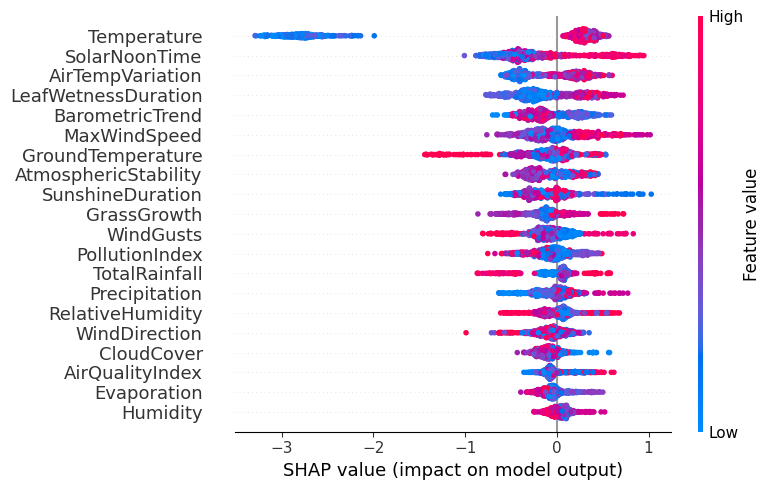

Dependence Plot for 'Temperature' and Class 'Rainy' (colored by 'Humidity')


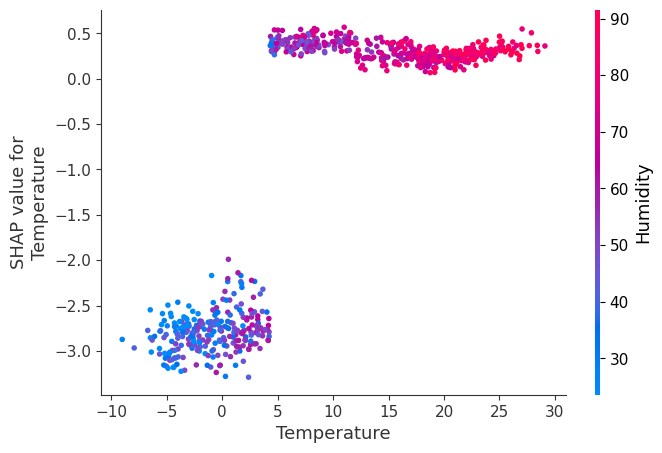

Force Plot for index 15


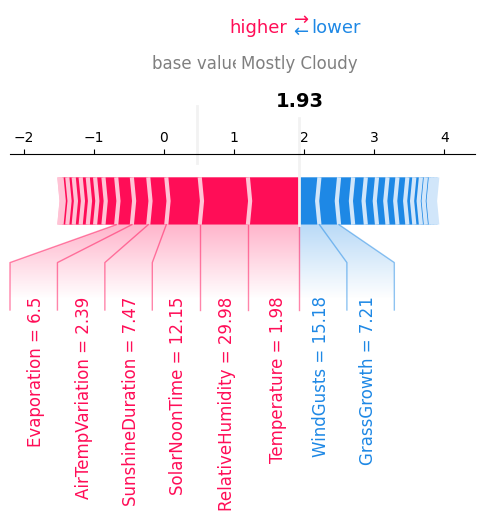

Decision Plot for index 15


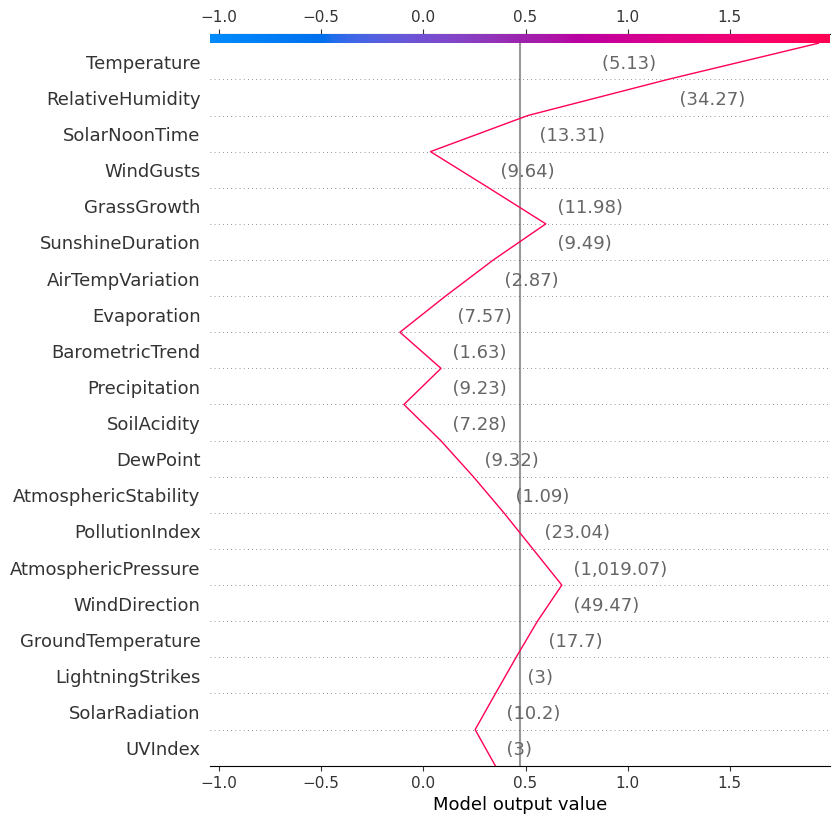

Waterfall Plot for index 15


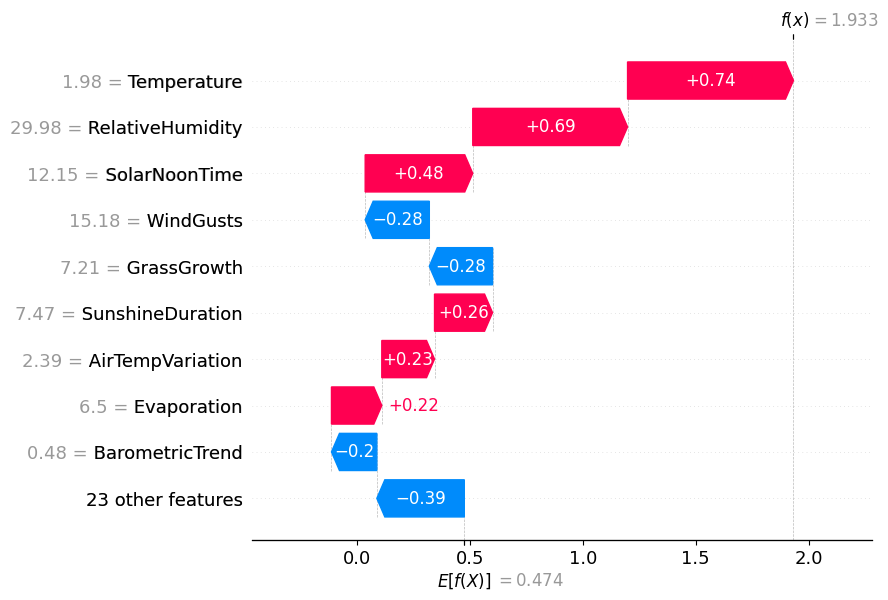

Partial Dependence Plot for 'Temperature' (first 5 test-set)


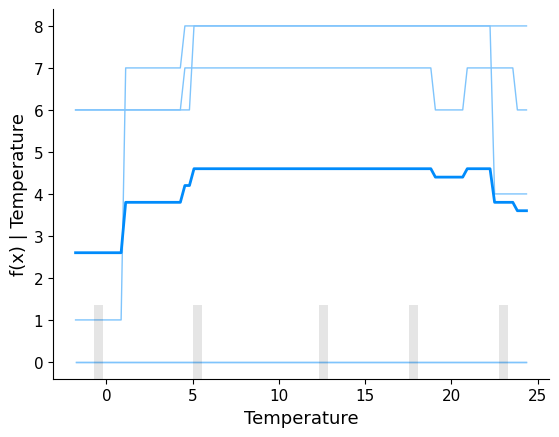

In [ ]:
# Load the Test Dataset
test_url = "https://www.dropbox.com/scl/fi/yqihhgvrzwmr4p00ygwlg/test.csv?rlkey=9brcpbfnf4fr41q0seah1z3fr&st=moq8i5m7&dl=0&raw=1"
df_test = pd.read_csv(test_url, index_col='DateID').round(2)
X_test = df_test.copy()

# Class Names
class_names = encoder.classes_.tolist()

# Create a SHAP explainer
explainer = shap.Explainer(model)

# Calculate SHAP values
shap_values = explainer(X_test)

# Summary Plot
class_explain = 8
print(f"Summary Plot for Class '{class_names[class_explain]}'")
shap.summary_plot(shap_values[:,:,class_explain], X_test,
                  plot_type="dot", # 'bar', 'violin'
                  plot_size=(8,5))

# Dependence Plots
print(f"Dependence Plot for 'Temperature' and Class '{class_names[class_explain]}' (colored by 'Humidity')")
shap.dependence_plot('Temperature', explainer.shap_values(X_test)[:,:,class_explain], X_test, interaction_index='Humidity')

# Force Plot
id_explain = 15
id_predict = model.predict(X_test.values[id_explain].reshape(1, -1))[0]
print(f"Force Plot for index {id_explain}")
shap.plots.force(shap_values[id_explain,:,id_predict], X_test,
                 out_names=class_names[id_predict],
                 figsize=(6, 4), text_rotation=90, matplotlib=True)

# Decision Plot
print(f"Decision Plot for index {id_explain}")
shap.decision_plot(explainer.expected_value[id_predict],
                   explainer.shap_values(X_test)[id_explain,:,id_predict], X_test)

# Waterfall Plot
print(f"Waterfall Plot for index {id_explain}")
shap.plots.waterfall(shap_values[id_explain,:,id_predict])

# Partial Dependence Plots
print(f"Partial Dependence Plot for 'Temperature' (first 5 test-set)")
shap.partial_dependence_plot('Temperature', pipeline.predict, X_test[:5])

<div class='markdown-google-sans'>

#### <font color=#DE8F07>**🌟　SHAP Values for Image Classification**</font>
</div>

| 　 | 　 |
|-------|------|
| <img src="https://i.imgur.com/QfkwLDQ.png" width=300 /> | **🎯 Goal** Your goal is to classify the types of clothing<br> with one of the following 10 classes.<br><img src="https://i.imgur.com/WnY3kEh.png" width=300 />

In [ ]:
# Basic Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import random

# Deep Learning Libraries
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

# Load the train dataset
train_url = "https://www.dropbox.com/scl/fi/6tgxge3y0jot8075d5lng/train_imageclass.csv?rlkey=b4cj2ifgbzjlrcmals3t98eu2&st=zmwpkgke&dl=0&raw=1"
df_train = pd.read_csv(train_url, index_col='ID')
target_col = 'label'

# Set training set and label
X_train, y_train = df_train.drop(columns='label'), df_train['label']

# Reshaping x_train into 2D and normalize
X_train = X_train.values.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
y_train = y_train.values

# One-hot encoding of labels
num_classes = 10
y_train = np.eye(num_classes)[y_train.reshape(-1)]

def create_model():
    learning_rate =  0.001
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_model()

history = model.fit(X_train, y_train, epochs=5,
                    batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 5s 4ms/step - loss: 0.5788 - accuracy: 0.8008 - val_loss: 0.4731 - val_accuracy: 0.8338
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.4205 - accuracy: 0.8522 - val_loss: 0.4027 - val_accuracy: 0.8599
Epoch 3/5
750/750 [==============================] - 3s 3ms/step - loss: 0.3832 - accuracy: 0.8641 - val_loss: 0.3826 - val_accuracy: 0.8669
Epoch 4/5
750/750 [==============================] - 3s 3ms/step - loss: 0.3543 - accuracy: 0.8740 - val_loss: 0.3711 - val_accuracy: 0.8691
Epoch 5/5
750/750 [==============================] - 2s 3ms/step - loss: 0.3389 - accuracy: 0.8786 - val_loss: 0.3571 - val_accuracy: 0.8733


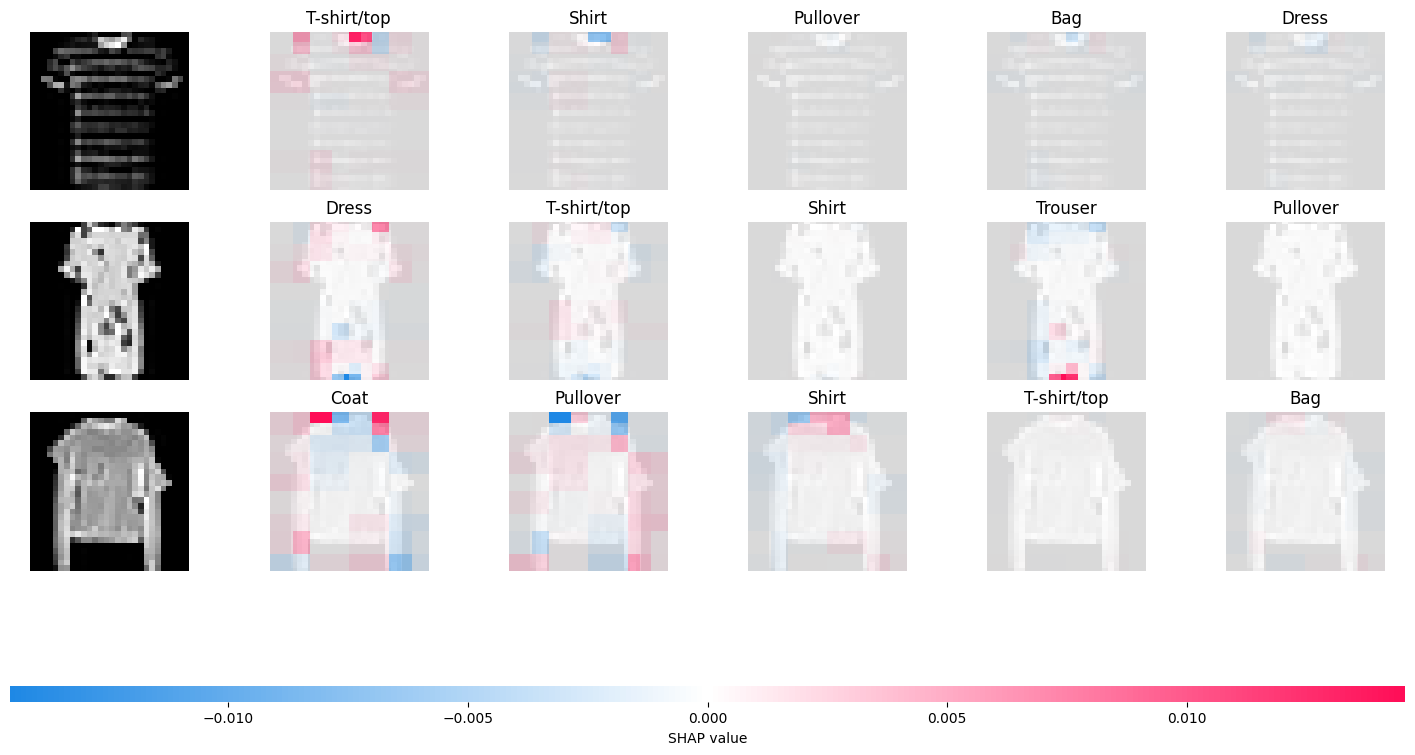

In [ ]:
# Load the train dataset
test_url = "https://www.dropbox.com/scl/fi/r8tjg2dea59q5timei3dg/test_imageclass.csv?rlkey=1dzvhckz1x9x3e05vgp00lm6f&st=qnmdgala&dl=0&raw=1"
df_test = pd.read_csv(test_url, index_col='ID')

# Preprocess the test set
X_test = df_test.values.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

# Define correct class names for Fashion-MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Function to get model output
def f(x):
    tmp = x.copy()
    return model(tmp)

# Function to explain the model's predictions
def explain_model(model, X_explain):
    # Define a masker
    masker = shap.maskers.Image("blur(7, 7)", X_explain[0].shape)

    # Create an explainer with model and image masker
    explainer = shap.Explainer(f, masker, output_names=class_names)

    # Compute SHAP values
    shap_values = explainer(X_explain, max_evals=1000,  # Increase max_evals for more details
                            batch_size=50,
                            outputs=shap.Explanation.argsort.flip[:5])

    return shap_values

# Prepare data to explain
explain_size = 3
explain_indices = np.random.choice(X_test.shape[0], explain_size, replace=False)
X_explain = X_test[explain_indices]

# Get SHAP values
shap_values = explain_model(model, X_explain)

# Visualize SHAP values
shap.image_plot(shap_values)

<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 15-2**
</div>

Using the following dataset, explain the binary classification model using various shap visualization for class 1 ("Play") and for ID 18.

Note the change of index compared to the multiclass one and fix the code for the "Waterfall Plot"

In [ ]:
!pip install shap -q

In [ ]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

practice_dataset_url = "https://www.dropbox.com/scl/fi/p0n2vdwbve761sfoxrgf3/golf_dataset_mini_with_testset_practice.csv?rlkey=1r1mw6w9fhtxwijejbns1yknt&dl=0&raw=1"
df = pd.read_csv(practice_dataset_url)
target_col = 'Play'

X_train, y_train = df.drop(columns=target_col)[:-10], df[target_col][:-10]

# Create a simple model
model = XGBClassifier(random_state=42)

# Fit the pipeline
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Summary Plot for Class 'Play'


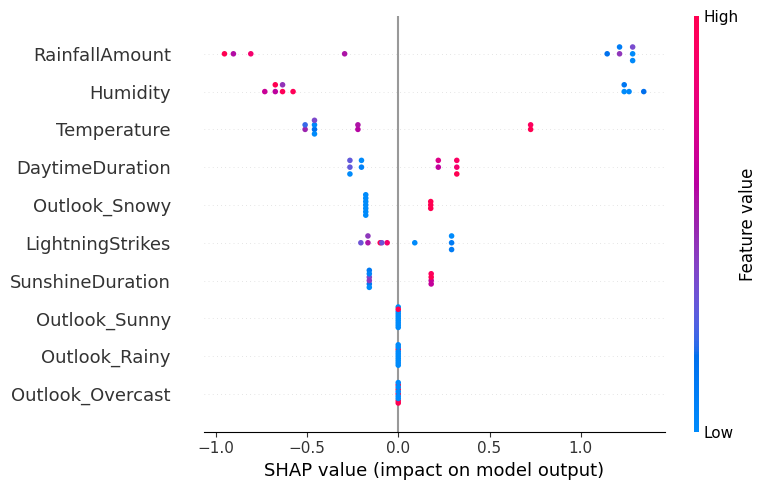

Dependence Plot for 'Temperature' and Class 'Play' (colored by 'Humidity')


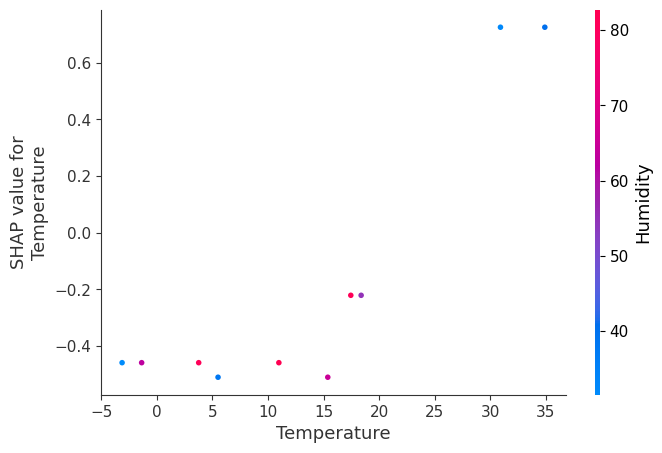

IndexError: index 10 is out of bounds for axis 0 with size 10

In [ ]:
X_test = df.drop(columns=target_col)[-10:].copy()

# Class Names
class_names = ['No Play', 'Play']

# Create a SHAP explainer
explainer = shap.Explainer(model)

# Calculate SHAP values
shap_values = explainer(X_test)

# Summary Plot
class_explain = 1
print(f"Summary Plot for Class '{class_names[class_explain]}'")
shap.summary_plot(shap_values, X_test,
                  plot_type="dot", # 'bar', 'violin'
                  plot_size=(8,5))

# Dependence Plots
print(f"Dependence Plot for 'Temperature' and Class '{class_names[class_explain]}' (colored by 'Humidity')")
shap.dependence_plot('Temperature', explainer.shap_values(X_test), X_test, interaction_index='Humidity')

# Force Plot
id_explain = 10
id_predict = model.predict(X_test.values[id_explain].reshape(1, -1))[0]
print(f"Force Plot for index {id_explain}")
shap.plots.force(shap_values[id_explain], X_test,
                 figsize=(6, 4), text_rotation=90, matplotlib=True)

# Decision Plot
print(f"Decision Plot for index {id_explain}")
shap.decision_plot(explainer.expected_value,
                   explainer.shap_values(X_test)[id_explain], X_test)

# Waterfall Plot
print(f"Waterfall Plot for index {id_explain}")
shap.plots.waterfall(shap_values[id_explain,:,id_predict])

# Partial Dependence Plots
print(f"Partial Dependence Plot for 'Temperature' (first 5 test-set)")
shap.partial_dependence_plot('Temperature', pipeline.predict, X_test[:5])

## <font size=7> ───────────────────</font>
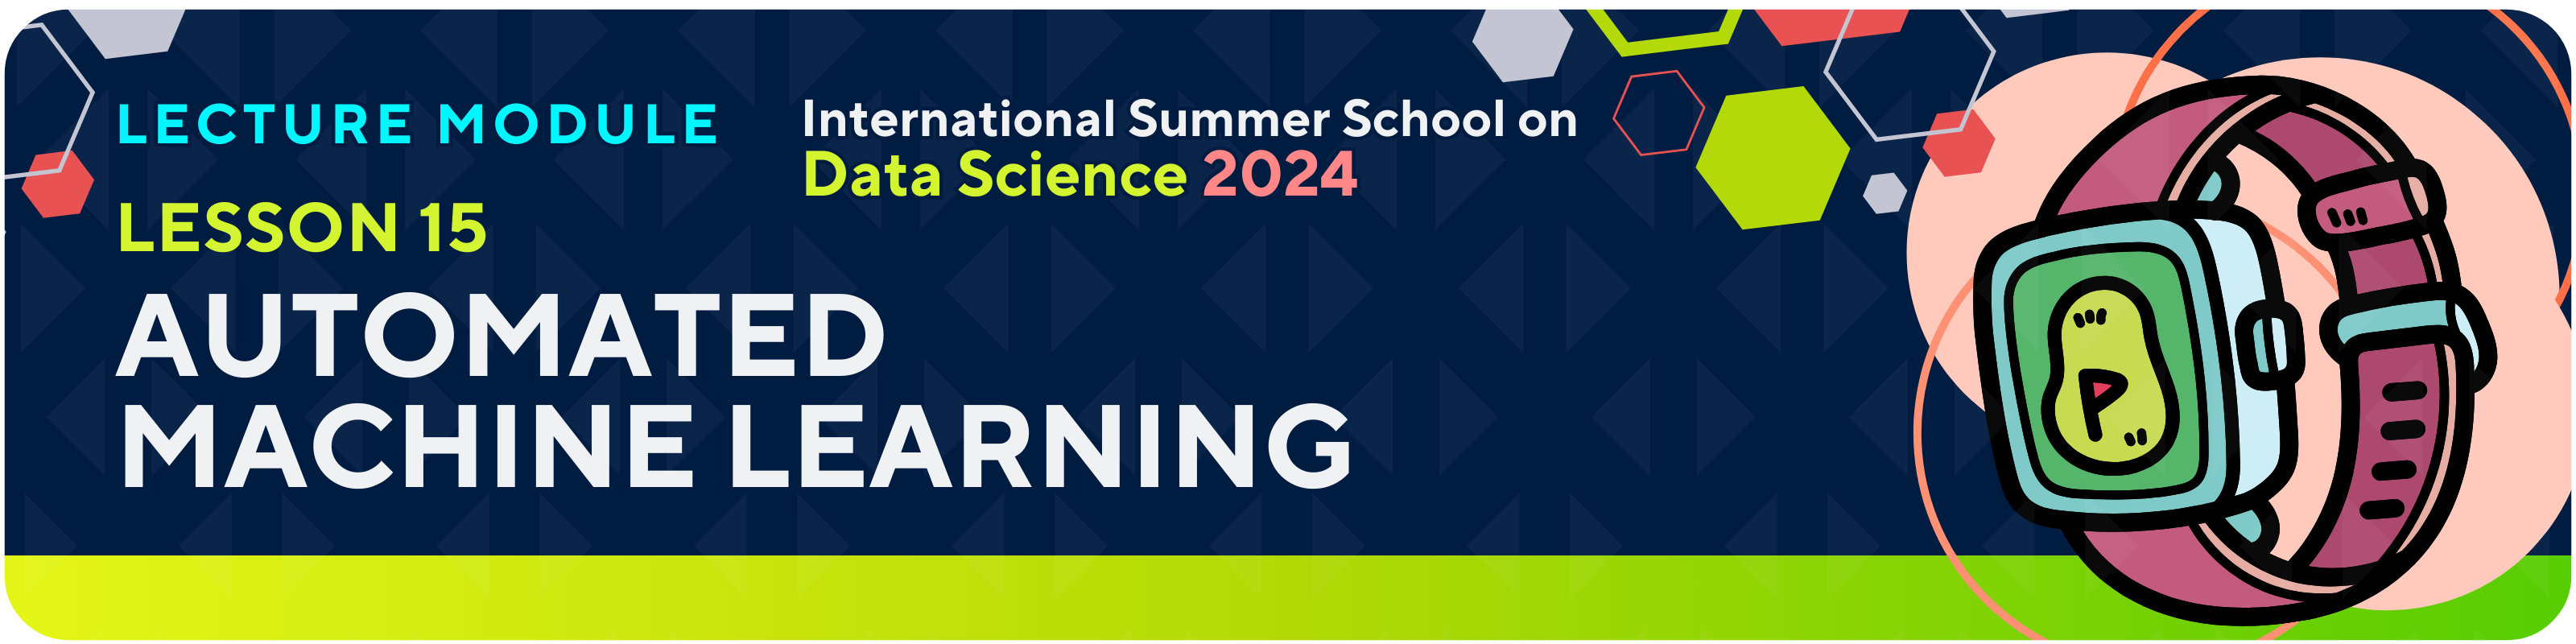

**⚠️ Reminder**<br>Run only one AutoML model at a time.<br> To switch models, reset your environment: 'Runtime' > 'Disconnect and delete runtime'.

<div class='markdown-google-sans'>

## <font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**Intro To Automated Machine Learning**
</div>

<div class='markdown-google-sans'>

### **<font color=#819A00> About Automated Machine Learning**
</div>


<img src="https://i.imgur.com/Plhz5ua.png" width=800 />
<img src="https://i.imgur.com/vraYqDk.png" width=800 />


<div class='markdown-google-sans'>

### **<font color=#819A00> Key Components of AutoML Systems**
</div>

<img src="https://i.imgur.com/H0SNnfW.png" width=800 />
<img src="https://i.imgur.com/FfuDQ5K.png" width=800 />
<img src="https://i.imgur.com/iCfdohp.png" width=800 />
<img src="https://i.imgur.com/wQxSIkb.png" width=800 />
<img src="https://i.imgur.com/r5M9kgF.png" width=800 />
<img src="https://i.imgur.com/23l60XO.png" width=800 />
<img src="https://i.imgur.com/bYQPX2t.png" width=800 />


<div class='markdown-google-sans'>

### **<font color=#819A00>Benefits & Limitations**
</div>

<img src="https://i.imgur.com/gkP1gzO.png" width=800 />
<img src="https://i.imgur.com/0gynXm7.png" width=800 />

---
---

<div class='markdown-google-sans'>

## **15.3**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**AutoML Frameworks (Traditional ML-centric)**
</div>


<div class='markdown-google-sans'>

### **<font color=#819A00>Popular AutoML Frameworks**
</div>

<img src="https://i.imgur.com/WdYc5HV.png" width=800 />
<img src="https://i.imgur.com/l9lp4vG.png" width=800 />
<img src="https://i.imgur.com/ZLbsNIT.png" width=800 />


<img src="https://i.imgur.com/tY2q2yJ.png" width=800 />

<div class='markdown-google-sans'>

### 📊　Dataset & Libraries
</div>

| 　　 | 　 |
|-------|----------|
| <img src="https://i.imgur.com/OEJxrDE.png" width=300 /> | **🎯 Goal**: Based on weather conditions of a day,<br> predict the outlook for the next day based on 10 categories. |

All the data loading and machine learning processes will be done individually.

<div class='markdown-google-sans'>

### Like Scikit-learn API
</div>


<div class='markdown-google-sans'>

#### <font color=#DE8F07>**🌟　FLAML**
</div>

<img src="https://i.imgur.com/S5qw5di.png" width=800 />
<img src="https://i.imgur.com/4y1nCCM.png" width=800 />

In [ ]:
!pip install flaml -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 5.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from flaml import AutoML

# LOAD TRAINING DATASET
train_url = "https://www.dropbox.com/scl/fi/4uwpw2pldan0xxs2154fr/train.csv?rlkey=rwcpickd2vrls56abenpr1it4&st=4k2oj5x6&dl=0&raw=1"
df_train = pd.read_csv(train_url, index_col='DateID', parse_dates=['DateID'])

# SET FEATURE MATRIX & TARGET VARIABLE
target_col = 'OutlookTomorrow'
X_train = df_train.drop(columns=[target_col])
y_train = df_train[target_col]

# Create and train the FLAML model
automl = AutoML()
automl.fit(X_train=X_train,
           y_train=y_train,
           task='multiclass',
           metric='macro_f1',
           time_budget=300,  # 5 minutes
           verbose=3)

# Get the best pipeline
best_pipeline = automl.model.estimator
print(best_pipeline)

[flaml.automl.logger: 07-18 12:48:00] {1680} INFO - task = multiclass
[flaml.automl.logger: 07-18 12:48:00] {1691} INFO - Evaluation method: cv
[flaml.automl.logger: 07-18 12:48:00] {1789} INFO - Minimizing error metric: 1-macro_f1
[flaml.automl.logger: 07-18 12:48:00] {1901} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.logger: 07-18 12:48:00] {2219} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 07-18 12:48:02] {2345} INFO - Estimated sufficient time budget=11491s. Estimated necessary time budget=265s.
[flaml.automl.logger: 07-18 12:48:02] {2392} INFO -  at 1.4s,	estimator lgbm's best error=0.7217,	best estimator lgbm's best error=0.7217
[flaml.automl.logger: 07-18 12:48:02] {2219} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 07-18 12:48:05] {2392} INFO -  at 4.9s,	estimator lgbm's best error=0.7217,	best estimator lgbm's best error=0.7217
[flaml.automl.logger: 07-18 12:48:05

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 07-18 12:53:01] {2392} INFO -  at 300.5s,	estimator lrl1's best error=0.6716,	best estimator rf's best error=0.5766
[flaml.automl.logger: 07-18 12:53:01] {2628} INFO - retrain rf for 0.4s
[flaml.automl.logger: 07-18 12:53:01] {2631} INFO - retrained model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None,
                       max_features=0.1399644659398426, max_leaf_nodes=28,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, monotonic_cst=None,
                       n_estimators=38, n_jobs=-1, oob_score=False,
                       random_state=12032022, verbose=0, warm_start=False)
[flaml.automl.logger: 07-18 12:53:01] {1931} INFO - fit succeeded
[flaml.automl.logger: 07-18 12:53:01] {1932} INFO - Time taken to find the best model: 145.92568969726

In [ ]:
# Load the Test Dataset
test_url = "https://www.dropbox.com/scl/fi/yqihhgvrzwmr4p00ygwlg/test.csv?rlkey=9brcpbfnf4fr41q0seah1z3fr&st=moq8i5m7&dl=0&raw=1"
df_test = pd.read_csv(test_url, index_col='DateID')

# Predict the test dataset
y_pred = automl.predict(df_test)

# Convert prediction into dataframe
submission = pd.DataFrame(y_pred, index=df_test.index, columns=[target_col])

# Write a CSV file for submission
submission.to_csv('FLAML_result.csv')

print(submission)

           OutlookTomorrow
DateID                    
fe97c2d8     Mostly Cloudy
be33fd88             Rainy
824bae96             Clear
6589fc6c  Frigid and Windy
5d837fb0               Hot
...                    ...
c35ee3f9     Mostly Cloudy
3d1d573a     Mostly Cloudy
338db194             Clear
94221b87     Mostly Cloudy
ec4e6162     Partly Cloudy

[730 rows x 1 columns]


<div class='markdown-google-sans'>

#### <font color=#DE8F07>**🌟　MLJAR-Supervised**
</div>


<img src="https://i.imgur.com/LCuAyTJ.png" width=800 />
<img src="https://i.imgur.com/aKujXrr.png" width=800 />


In [ ]:
!pip install mljar-supervised -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.1/127.1 kB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 30.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from supervised.automl import AutoML

# LOAD TRAINING DATASET
train_url = "https://www.dropbox.com/scl/fi/4uwpw2pldan0xxs2154fr/train.csv?rlkey=rwcpickd2vrls56abenpr1it4&st=4k2oj5x6&dl=0&raw=1"
df_train = pd.read_csv(train_url, index_col='DateID', parse_dates=['DateID'])

# SET FEATURE MATRIX & TARGET VARIABLE
target_col = 'OutlookTomorrow'
X_train = df_train.drop(columns=[target_col])
y_train = df_train[target_col]

# Create and train the MLJAR model
automl = AutoML(mode="Compete",
                ml_task="multiclass_classification",
                eval_metric="f1",
                total_time_limit=300,  # 5 minutes
                verbose=True)

automl.fit(X_train, y_train)

# Print summary of models
automl.report()

<ipython-input-6-2d1955b424f8>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


AutoML directory: AutoML_1
The task is multiclass_classification with evaluation metric f1
AutoML will use algorithms: ['Decision Tree', 'Linear', 'Random Forest', 'Extra Trees', 'LightGBM', 'Xgboost', 'CatBoost', 'Neural Network', 'Nearest Neighbors']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree f1 0.428571 trained in 1.35 seconds
Disable stacking for split validation
* Step simple_algorithms will try to check up to 3 models
2_DecisionTree f1 0.441558 trained in 1.26 seconds
3_DecisionTree f1 0.441558 trained in 1.29 seconds
4_Linear f1 0.454545 trained in 3.52 seconds
* Step default_algorithms will try to check up to 7 mo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


32_CatBoost_KMeansFeatures f1 0.519481 trained in 8.24 seconds
Not enough time to perform features selection. Skip
Time needed for features selection ~ 47.0 seconds
Please increase total_time_limit to at least (533 seconds) to have features selection
Skip insert_random_feature because no parameters were generated.
Skip features_selection because no parameters were generated.
* Step hill_climbing_1 will try to check up to 22 models
69_CatBoost f1 0.545455 trained in 6.04 seconds
70_CatBoost f1 0.545455 trained in 9.23 seconds
71_ExtraTrees f1 0.493506 trained in 2.25 seconds
72_ExtraTrees f1 0.532468 trained in 2.37 seconds
73_Xgboost f1 0.493506 trained in 5.63 seconds
74_RandomForest f1 0.493506 trained in 2.93 seconds
75_Xgboost f1 0.532468 trained in 8.78 seconds
* Step hill_climbing_2 will try to check up to 14 models
76_Xgboost f1 0.545455 trained in 3.94 seconds
77_Xgboost f1 0.532468 trained in 6.15 seconds
78_Xgboost f1 0.506494 trained in 3.64 seconds
79_Xgboost f1 0.493506 tr

AttributeError: 'AutoML' object has no attribute 'best_model'

In [ ]:
# Load the Test Dataset
test_url = "https://www.dropbox.com/scl/fi/yqihhgvrzwmr4p00ygwlg/test.csv?rlkey=9brcpbfnf4fr41q0seah1z3fr&st=moq8i5m7&dl=0&raw=1"
df_test = pd.read_csv(test_url, index_col='DateID')

# Predict the test dataset
y_pred = automl.predict(df_test)

# Convert prediction into dataframe
submission = pd.DataFrame(y_pred, index=df_test.index, columns=[target_col])

# Write a CSV file for submission
submission.to_csv('MLJAR_result.csv')

print(submission)

    OutlookTomorrow
0     Mostly Cloudy
1             Rainy
2             Clear
3            Frosty
4             Rainy
..              ...
725   Mostly Cloudy
726   Mostly Cloudy
727           Clear
728   Mostly Cloudy
729   Partly Cloudy

[730 rows x 1 columns]


<div class='markdown-google-sans'>

#### <font color=#DE8F07>**🌟　TPOT**
</div>

<img src="https://i.imgur.com/LRMmSJh.png" width=800 />
<img src="https://i.imgur.com/aeIZADJ.png" width=800 />

In [ ]:
!pip install tpot -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 844.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split

# LOAD TRAINING DATASET
train_url = "https://www.dropbox.com/scl/fi/4uwpw2pldan0xxs2154fr/train.csv?rlkey=rwcpickd2vrls56abenpr1it4&st=4k2oj5x6&dl=0&raw=1"
df_train = pd.read_csv(train_url, index_col='DateID')

# SET FEATURE MATRIX & TARGET VARIABLE
target_col = 'OutlookTomorrow'
X_train, y_train = df_train.drop(columns=target_col), df_train[target_col]

# Convert Categorical Target Variable into Label (0,1,2,...)
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)

# Create and train the TPOTClassifier
tpot = TPOTClassifier(
    generations=5,
    population_size=50,
    verbosity=2,
    random_state=42,
    cv=5,
    n_jobs=-1,
    max_time_mins=60
)

tpot.fit(X_train, y_train)

# Print the best pipeline
print(tpot.fitted_pipeline_)

Optimization Progress:   0%|          | 0/50 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.4915541974365503

Generation 2 - Current best internal CV score: 0.4967744673627026

Generation 3 - Current best internal CV score: 0.4967744673627026

Generation 4 - Current best internal CV score: 0.496782955606485

Generation 5 - Current best internal CV score: 0.496782955606485

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.2, min_samples_leaf=16, min_samples_split=20, n_estimators=100)
Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(criterion='entropy', max_features=0.2,
                                        min_samples_leaf=16,
                                        min_samples_split=20,
                                        random_state=42))])


In [ ]:
# Load the Test Dataset
test_url = "https://www.dropbox.com/scl/fi/yqihhgvrzwmr4p00ygwlg/test.csv?rlkey=9brcpbfnf4fr41q0seah1z3fr&st=moq8i5m7&dl=0&raw=1"
df_test = pd.read_csv(test_url, index_col='DateID')

# Predict the test dataset
y_pred = tpot.predict(df_test)

# Inverse label encoding
y_pred = encoder.inverse_transform(y_pred)

# Convert prediction into dataframe
submission = pd.DataFrame(y_pred, index=df_test.index, columns=[target_col])

# Write a CSV file for submission
submission.to_csv('TPOT_result.csv')

print(submission)

           OutlookTomorrow
DateID                    
fe97c2d8     Mostly Cloudy
be33fd88             Rainy
824bae96             Clear
6589fc6c  Frigid and Windy
5d837fb0               Hot
...                    ...
c35ee3f9     Mostly Cloudy
3d1d573a     Mostly Cloudy
338db194             Clear
94221b87             Snowy
ec4e6162     Partly Cloudy

[730 rows x 1 columns]


<div class='markdown-google-sans'>

#### <font color=#DE8F07>**🌟　BlueCast**
</div>


<img src="https://i.imgur.com/2zfR4Dw.png" width=800 />
<img src="https://i.imgur.com/uFd5CpQ.png" width=800 />

In [ ]:
!pip install bluecast -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.0/133.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 11.9 MB/s eta 0:00:00


2024-07-16 11:26:29,467 - root - INFO - BlueCast blueprint initialized.
2024-07-16 11:26:29,468 - root - INFO - Start detecting and casting feature types.
2024-07-16 11:26:29,474 - root - INFO - Dropped the following columns as being Nulls only: [].
2024-07-16 11:26:29,475 - root - INFO - Dropped the following columns as being Nulls only: [].
2024-07-16 11:26:29,487 - root - INFO - Dropped the following columns as constants only: [].
2024-07-16 11:26:29,491 - root - INFO - Dropped the following columns as constants only: [].
2024-07-16 11:26:29,528 - root - INFO - Start fitting target label encoder.
2024-07-16 11:26:29,533 - root - INFO - Start encoding target labels.
2024-07-16 11:26:29,539 - root - INFO - Start checking if GPU is available for usage.
2024-07-16 11:26:29,547 - root - WARNING - Failed with params {'device': 'cuda', 'tree_method': 'gpu_hist'}. Error: [11:26:29] /workspace/src/tree/updater_gpu_hist.cu:781: Exception in gpu_hist: [11:26:29] /workspace/src/tree/updater_gpu

  0%|          | 0/200 [00:00<?, ?it/s]

2024-07-16 11:41:12,804 - root - INFO - New best score: -0.4285300490608756 from random seed  33
2024-07-16 11:41:12,809 - root - INFO - Best params: {'validate_parameters': False, 'objective': 'multi:softprob', 'booster': 'gbtree', 'eval_metric': 'mlogloss', 'num_class': 11, 'max_depth': 8, 'alpha': 8.67974814885489e-06, 'lambda': 35.80556813971275, 'gamma': 5.446417086833399e-08, 'min_child_weight': 1.0254558970258476, 'subsample': 0.8269587072316258, 'colsample_bytree': 0.5123204494620479, 'colsample_bylevel': 0.9167915828280717, 'eta': 0.10305660159926935, 'steps': 629, 'tree_method': 'exact', 'device': 'cpu', 'grow_policy': 'lossguide'}
2024-07-16 11:41:12,819 - root - INFO - Start final model training


Best params: {'validate_parameters': False, 'objective': 'multi:softprob', 'booster': 'gbtree', 'eval_metric': 'mlogloss', 'num_class': 11, 'max_depth': 8, 'alpha': 8.67974814885489e-06, 'lambda': 35.80556813971275, 'gamma': 5.446417086833399e-08, 'min_child_weight': 1.0254558970258476, 'subsample': 0.8269587072316258, 'colsample_bytree': 0.5123204494620479, 'colsample_bylevel': 0.9167915828280717, 'eta': 0.10305660159926935, 'steps': 629, 'tree_method': 'exact', 'device': 'cpu', 'grow_policy': 'lossguide'}
Finished hyperparameter tuning


2024-07-16 11:41:15,427 - root - INFO - Finished training


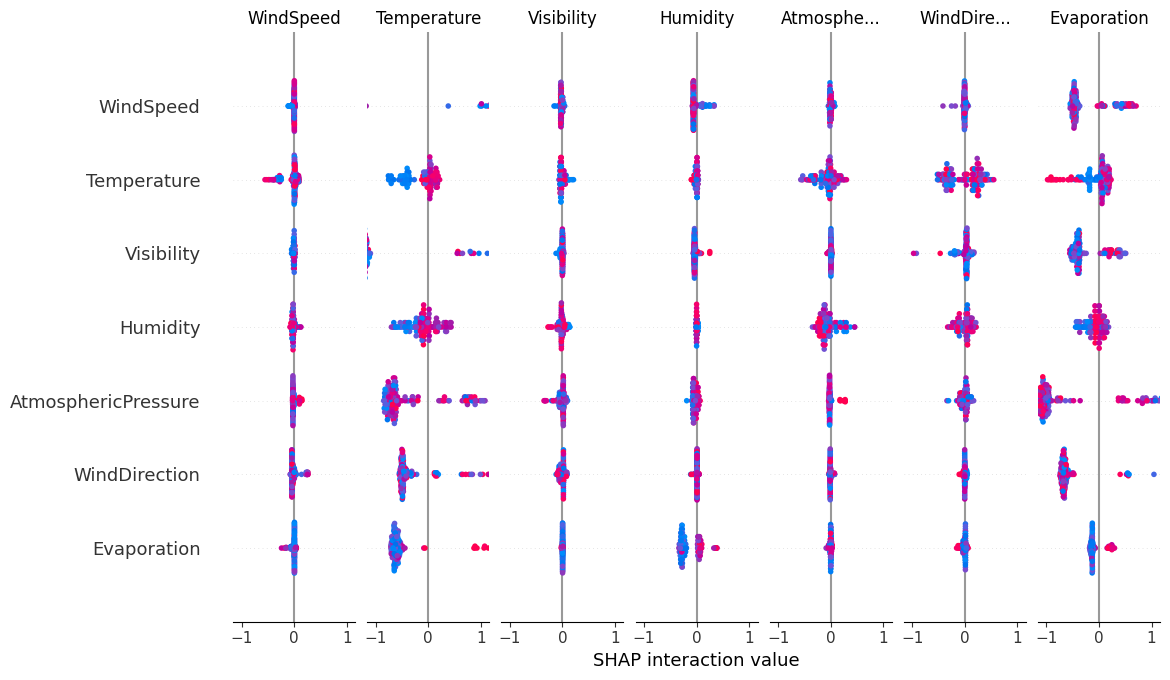

2024-07-16 11:41:36,677 - root - INFO - Show SHAP waterfall plot for idx 0 and class 0.


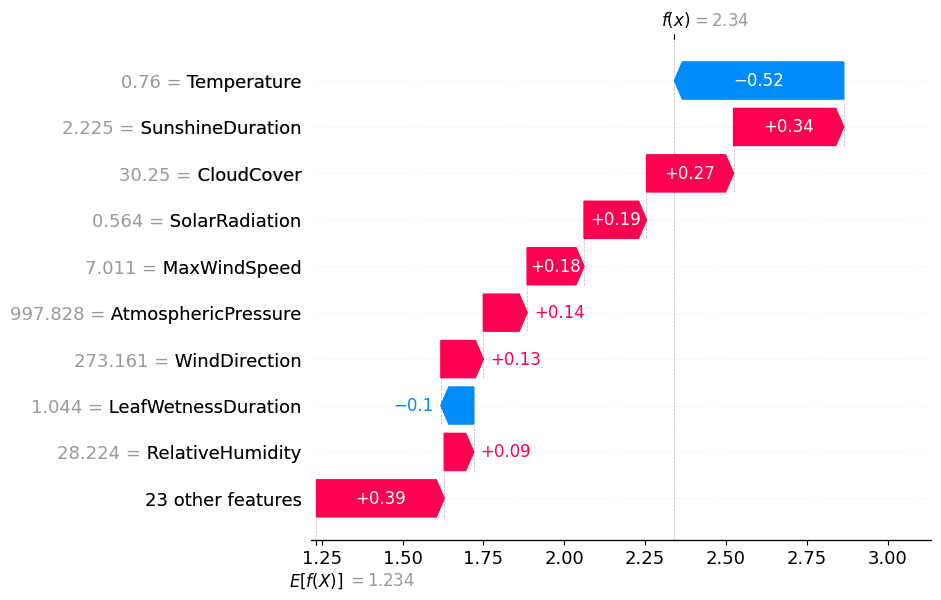

2024-07-16 11:41:38,203 - root - INFO - Show SHAP waterfall plot for idx 0 and class 1.


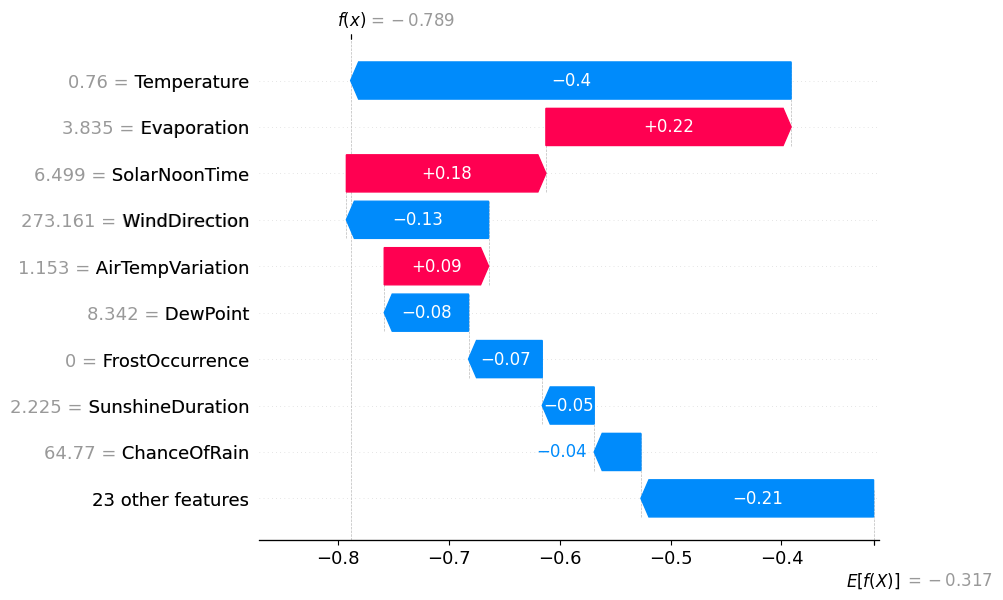

2024-07-16 11:41:39,619 - root - INFO - Show SHAP waterfall plot for idx 0 and class 2.


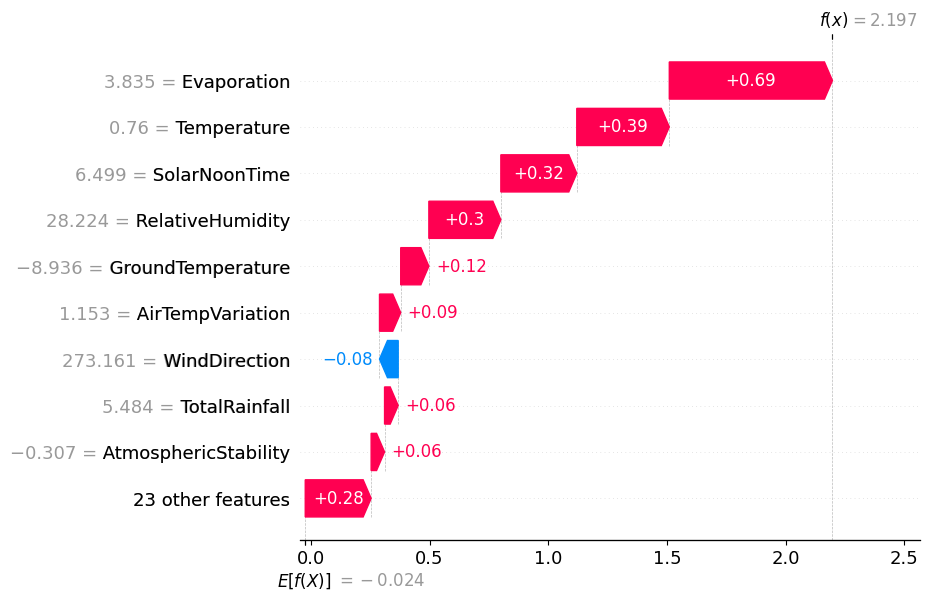

2024-07-16 11:41:41,241 - root - INFO - Show SHAP waterfall plot for idx 0 and class 3.


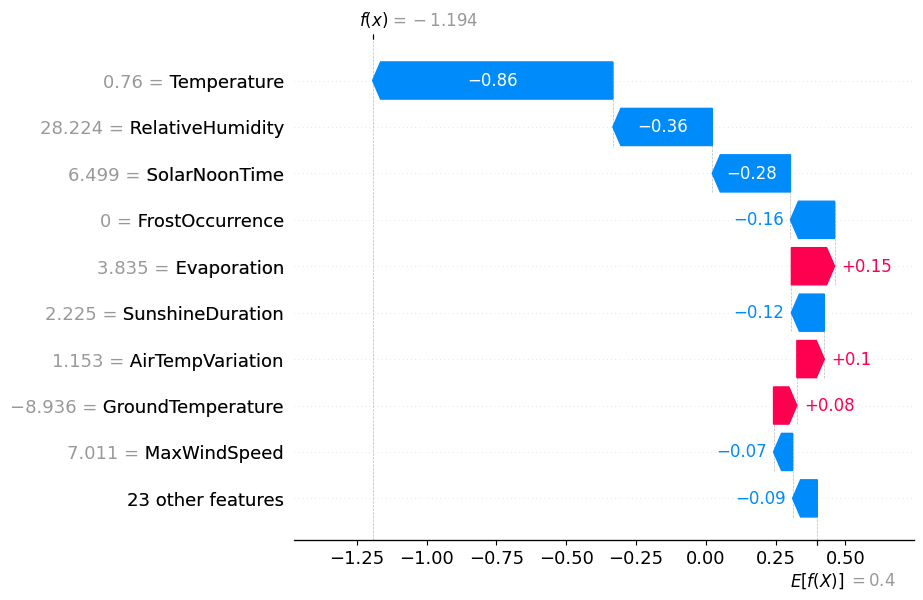

2024-07-16 11:41:42,577 - root - INFO - Show SHAP waterfall plot for idx 0 and class 4.


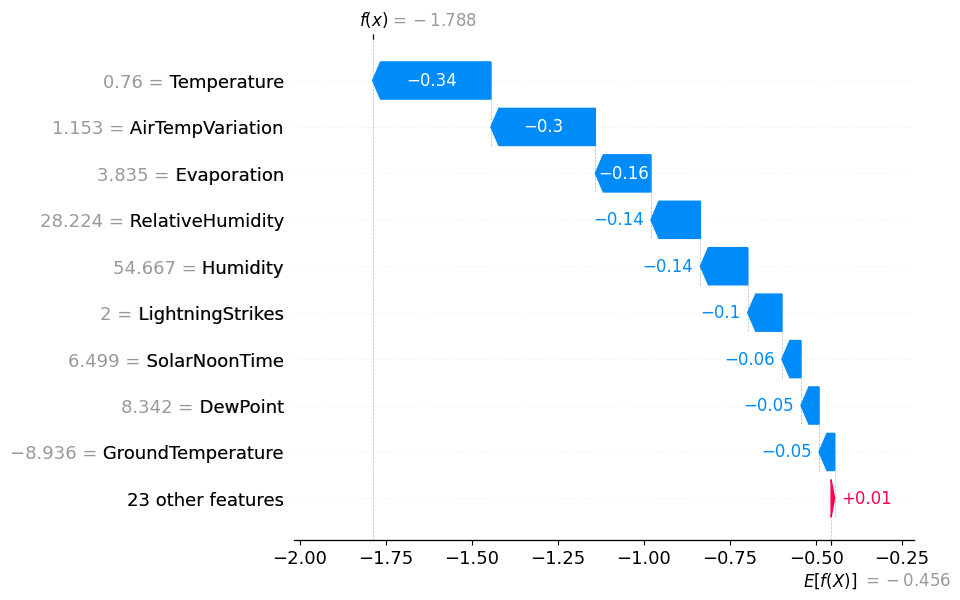

2024-07-16 11:41:43,602 - root - INFO - Show SHAP waterfall plot for idx 0 and class 5.


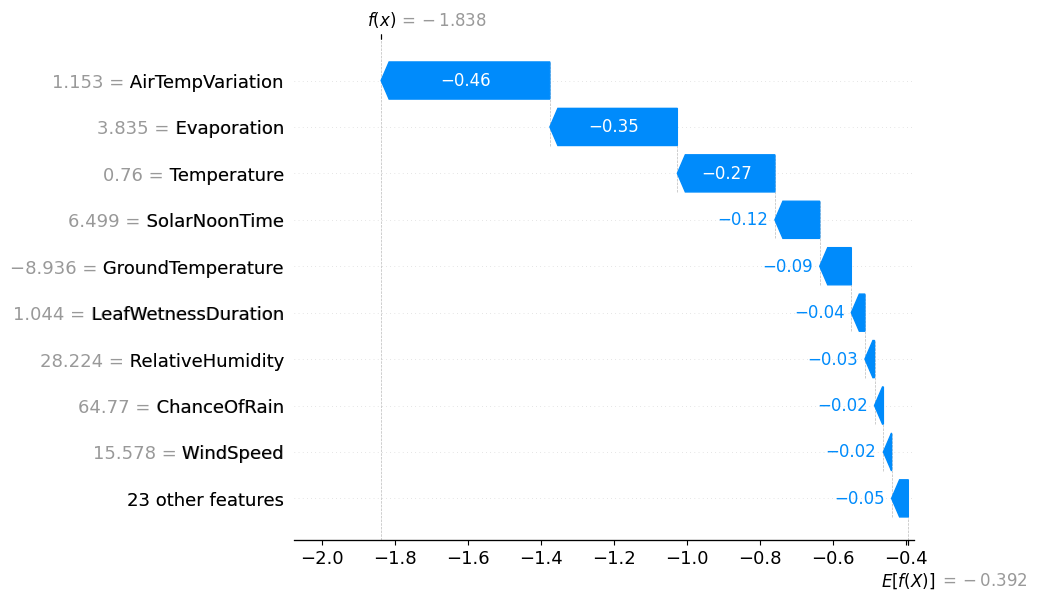

2024-07-16 11:41:44,653 - root - INFO - Show SHAP waterfall plot for idx 0 and class 6.


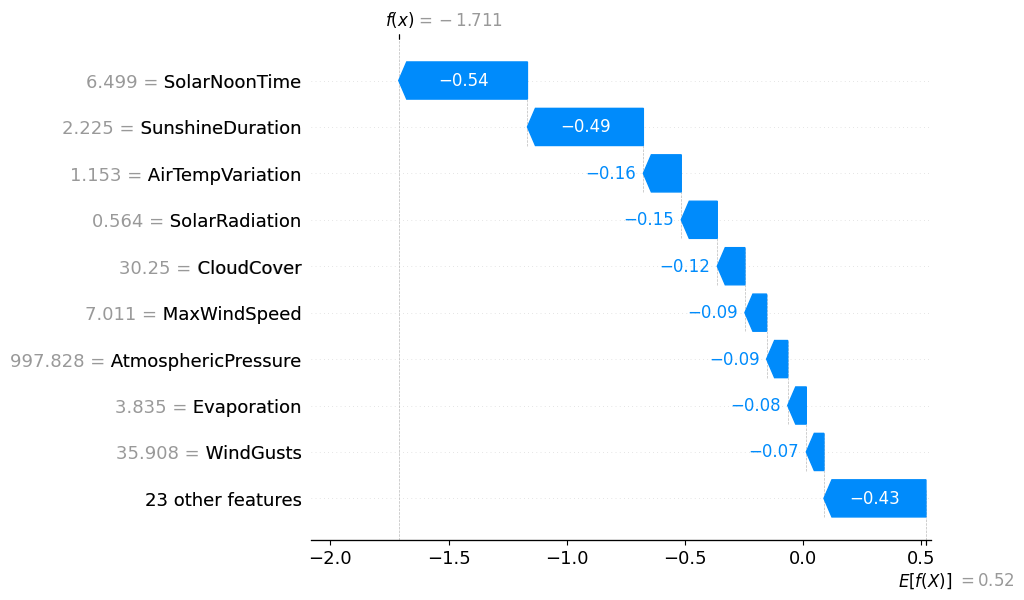

2024-07-16 11:41:45,638 - root - INFO - Show SHAP waterfall plot for idx 0 and class 7.


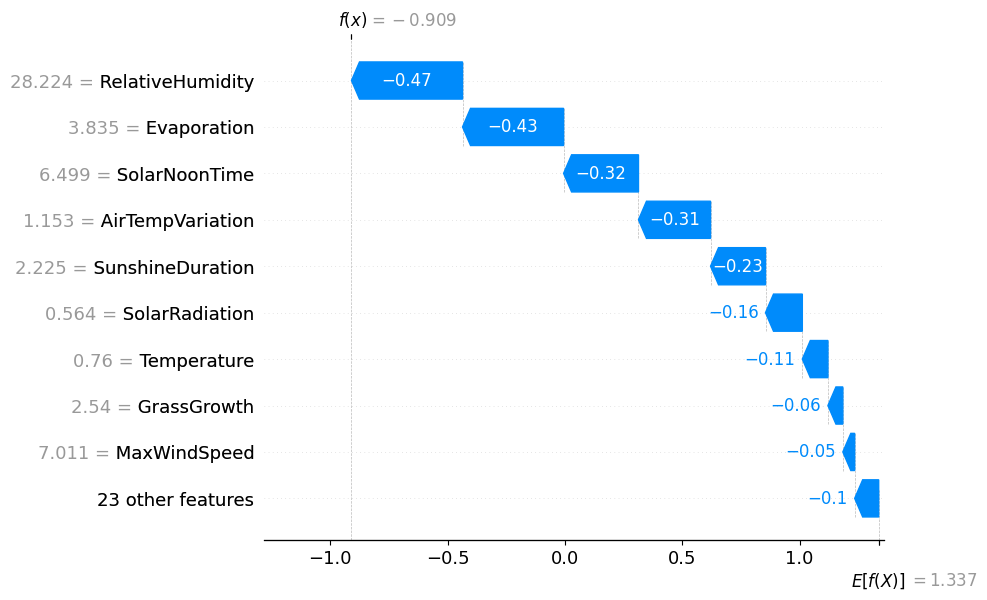

2024-07-16 11:41:46,609 - root - INFO - Show SHAP waterfall plot for idx 0 and class 8.


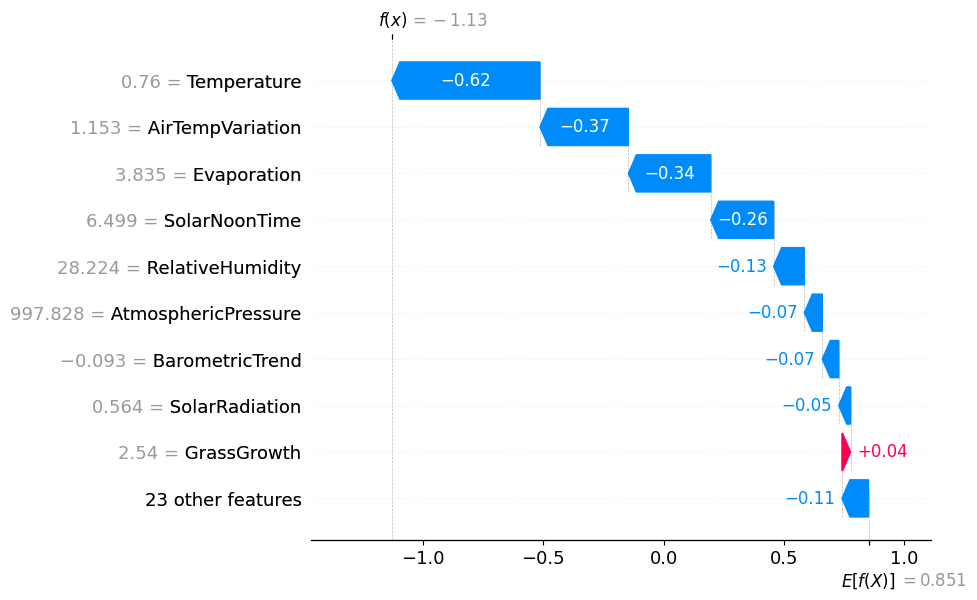

2024-07-16 11:41:47,641 - root - INFO - Show SHAP waterfall plot for idx 0 and class 9.


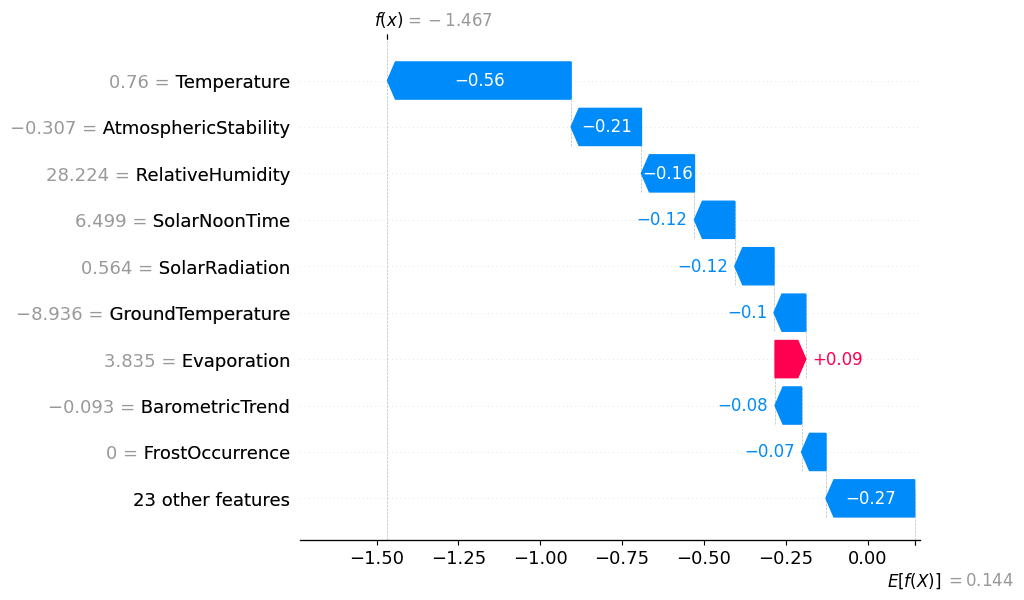

2024-07-16 11:41:48,645 - root - INFO - Show SHAP waterfall plot for idx 0 and class 10.


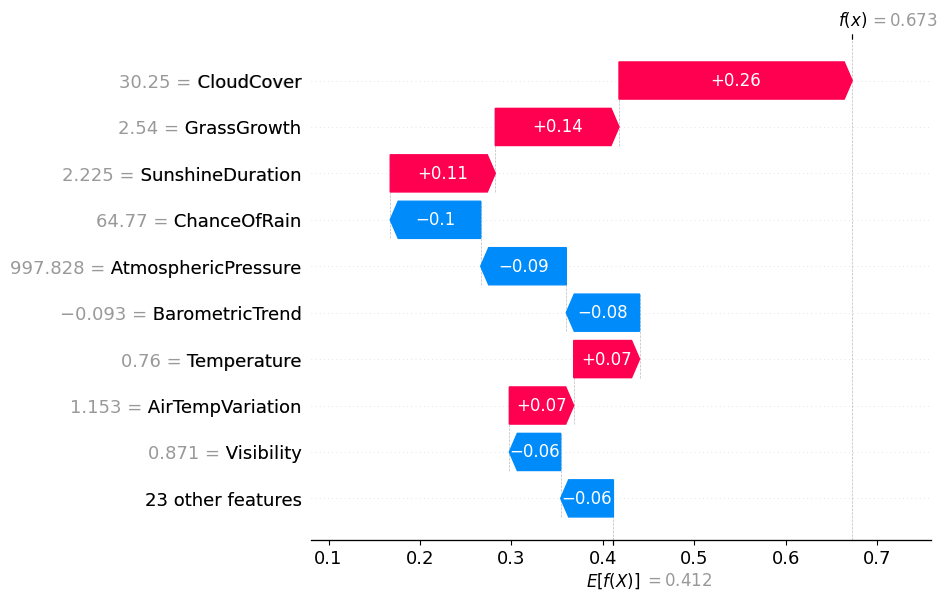

2024-07-16 11:41:49,645 - root - INFO - Plotting interactions of most important features by global SHAP values...
2024-07-16 11:41:49,652 - root - INFO - Showing dependence plots f top features for class 0...


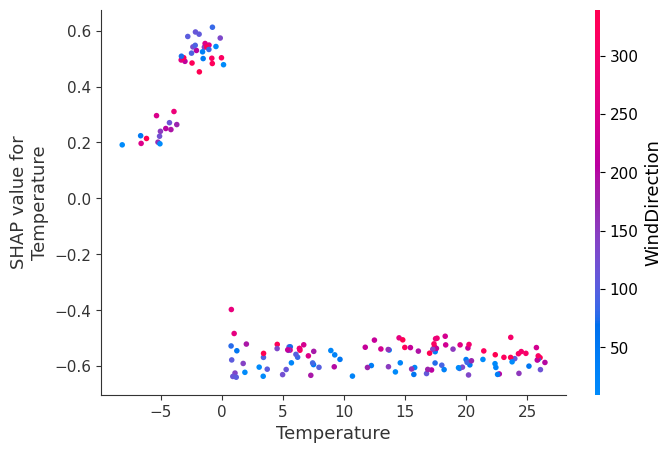

In [ ]:
import pandas as pd
import numpy as np
from bluecast.blueprints.cast import BlueCast

# LOAD TRAINING DATASET
train_url = "https://www.dropbox.com/scl/fi/4uwpw2pldan0xxs2154fr/train.csv?rlkey=rwcpickd2vrls56abenpr1it4&dl=1"
df_train = pd.read_csv(train_url, index_col='DateID', parse_dates=['DateID'])
target_col = 'OutlookTomorrow'

# Create and train the BlueCast model
automl = BlueCast(class_problem="multiclass") # "binary" for binary classification

# Fit the model
automl.fit(df_train, target_col=target_col)

In [ ]:
# Load the Test Dataset
test_url = "https://www.dropbox.com/scl/fi/yqihhgvrzwmr4p00ygwlg/test.csv?rlkey=9brcpbfnf4fr41q0seah1z3fr&dl=1"
df_test = pd.read_csv(test_url, index_col='DateID', parse_dates=['DateID'])

# Predict the test dataset
y_pred = automl.predict(df_test)

# Convert prediction back to original labels
y_pred = encoder.inverse_transform(y_pred)

# Convert prediction into dataframe
submission = pd.DataFrame(y_pred, index=df_test.index, columns=[target_col])

# Write a CSV file for submission
submission.to_csv('BlueCast_result.csv')

print("\nSubmission Preview:")
print(submission.head())

<div class='markdown-google-sans'>

### Somehow like Scikit-learn API
</div>

<div class='markdown-google-sans'>

#### <font color=#DE8F07>**🌟　EvalML**
</div>


<img src="https://i.imgur.com/TpBXD8K.png" width=800 />
<img src="https://i.imgur.com/pqUl7z3.png" width=800 />

In [ ]:
!pip install -U evalml featuretools compose -q

In [ ]:
import pandas as pd
import numpy as np
from evalml import AutoMLSearch
from google.colab import output
output.enable_custom_widget_manager() # Enable Widget

# LOAD TRAINING DATASET
train_url = "https://www.dropbox.com/scl/fi/4uwpw2pldan0xxs2154fr/train.csv?rlkey=rwcpickd2vrls56abenpr1it4&st=4k2oj5x6&dl=0&raw=1"
df_train = pd.read_csv(train_url, index_col='DateID', parse_dates=['DateID'])

# SET FEATURE MATRIX & TARGET VARIABLE
target_col = 'OutlookTomorrow'
X_train = df_train.drop(columns=[target_col])
y_train = df_train[target_col]

# Create and train the EvalML model
automl = AutoMLSearch(X_train=X_train,
                      y_train=y_train,
                      problem_type='multiclass',
                      objective='f1 weighted',
                      max_time=300,   # 5 minutes
                      verbose=3)
automl.search()

# Print summary of models
print(automl.rankings)

# Get the best pipeline
best_pipeline = automl.best_pipeline
print(best_pipeline)

AutoMLSearch will use mean CV score to rank pipelines.


<ipython-input-20-ae3dc7cdfc30>:9: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:33: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:33: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

INFO:evalml.automl.automl_search.verbose:AutoMLSearch will use mean CV score to rank pipelines.



*****************************


INFO:evalml.automl.automl_search.verbose:
*****************************


* Beginning pipeline search *


INFO:evalml.automl.automl_search.verbose:* Beginning pipeline search *


*****************************


INFO:evalml.automl.automl_search.verbose:*****************************


INFO:evalml.automl.automl_search.verbose:


Optimizing for F1 Weighted. 


INFO:evalml.automl.automl_search.verbose:Optimizing for F1 Weighted. 


Greater score is better.



INFO:evalml.automl.automl_search.verbose:Greater score is better.



Using SequentialEngine to train and score pipelines.


INFO:evalml.automl.automl_search.verbose:Using SequentialEngine to train and score pipelines.


Will stop searching for new pipelines after 300 seconds.



INFO:evalml.automl.automl_search.verbose:Will stop searching for new pipelines after 300 seconds.



Allowed model families: 



INFO:evalml.automl.automl_search.verbose:Allowed model families: 



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type': 'scatter',
              'uid': 'f2aa14a4-8658-4d5d-b2a5-19024528e886',
              'x': [],
              'y': []},
             {'marker': {'color': 'gray'},
              'mode': 'markers',
              'name': 'Iter score',
              'type': 'scatter',
              'uid': 'c138760b-dd62-4467-b6ae-158ede78889f',
              'x': [],
              'y': []}],
    'layout': {'showlegend': False,
               'template': '...',
               'title': {'text': ('Pipeline Search: Iteration vs.' ... 'ore at current iteration</sub>')},
               'xaxis': {'rangemode': 'tozero', 'title': {'text': 'Iteration'}},
               'yaxis': {'title': {'text': 'Validation Score'}}}
})

Evaluating Baseline Pipeline: Mode Baseline Multiclass Classification Pipeline


INFO:evalml.automl.automl_search.verbose:Evaluating Baseline Pipeline: Mode Baseline Multiclass Classification Pipeline


Mode Baseline Multiclass Classification Pipeline:


INFO:evalml.automl.automl_search.verbose:Mode Baseline Multiclass Classification Pipeline:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.066
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.066
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.065


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.065



*****************************


INFO:evalml.automl.automl_search.verbose:
*****************************


* Evaluating Batch Number 1 *


INFO:evalml.automl.automl_search.verbose:* Evaluating Batch Number 1 *


*****************************


INFO:evalml.automl.automl_search.verbose:*****************************


INFO:evalml.automl.automl_search.verbose:


Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + RF Classifier Select From Model:


INFO:evalml.automl.automl_search.verbose:Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + RF Classifier Select From Model:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.424
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.443
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.429


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.429



*****************************


INFO:evalml.automl.automl_search.verbose:
*****************************


* Evaluating Batch Number 2 *


INFO:evalml.automl.automl_search.verbose:* Evaluating Batch Number 2 *


*****************************


INFO:evalml.automl.automl_search.verbose:*****************************


INFO:evalml.automl.automl_search.verbose:


LightGBM Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:LightGBM Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.432
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.392
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.409


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.409


Extra Trees Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Extra Trees Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.398
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.429
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.413


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.413


Elastic Net Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Elastic Net Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.403
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.433
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.413


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.413
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.



XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

INFO:evalml.automl.automl_search.verbose:XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.384
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.416
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.413


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.413


Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.406
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.436
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.418


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.418



*****************************


INFO:evalml.automl.automl_search.verbose:
*****************************


* Evaluating Batch Number 3 *


INFO:evalml.automl.automl_search.verbose:* Evaluating Batch Number 3 *


*****************************


INFO:evalml.automl.automl_search.verbose:*****************************


INFO:evalml.automl.automl_search.verbose:


Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.402
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.433
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.415


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.415


Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.438
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.462
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.436


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.436
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.



XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

INFO:evalml.automl.automl_search.verbose:XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.376
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.370
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.378


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.378


Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.409
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.441
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.424


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.424


Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.427
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.462
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.435


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.435
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.



XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

INFO:evalml.automl.automl_search.verbose:XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.379
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.354
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.371


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.371


Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.409
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.410
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.415


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.415


Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.435
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.463
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.435


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.435
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.



XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

INFO:evalml.automl.automl_search.verbose:XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.369
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.332
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.363


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.363
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.



Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.378
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.420
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.402


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.402


Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.435
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.458
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.434


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.434
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.



XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

INFO:evalml.automl.automl_search.verbose:XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.411
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.366
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.392


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.392


Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.357
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.398
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.384


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.384


Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.434
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.463
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.434


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.434
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.



XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

INFO:evalml.automl.automl_search.verbose:XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.393
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.373
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.386


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.386


Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.416
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.443
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.430


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.430


Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.431
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.462
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.437


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.437
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.



XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

INFO:evalml.automl.automl_search.verbose:XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.423
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.401
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.423


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.423


Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.396
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.453
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.422


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.422


Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.431
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.459
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.431


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.431
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.



XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

INFO:evalml.automl.automl_search.verbose:XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.391
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.376
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.387


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.387


Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.362
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.388
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.385


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.385


Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.431
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.462
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.438


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.438
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.



XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

INFO:evalml.automl.automl_search.verbose:XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.410
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.374
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.386


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.386


Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.402
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.453
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.425


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.425


Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.431
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.463
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.433


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.433
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.



XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

INFO:evalml.automl.automl_search.verbose:XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.384
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.386
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.387


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.387


Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.409
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.441
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.424


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.424


Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.434
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.459
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.433


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.433
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.



XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

INFO:evalml.automl.automl_search.verbose:XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.408
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.354
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.389


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.389


Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.414
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.433
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.424


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.424


Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.430
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.462
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.434


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.434
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.



XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

INFO:evalml.automl.automl_search.verbose:XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.408
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.406
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.419


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.419


Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.404
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.440
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.423


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.423


Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.434
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.461
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.434


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.434
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.



XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

INFO:evalml.automl.automl_search.verbose:XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.404
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.363
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.392


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.392


Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.413
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.457
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.432


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.432


Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.435
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.454
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.433


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.433
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.



XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

INFO:evalml.automl.automl_search.verbose:XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.371
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.360
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.375


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.375


Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.419
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.413
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.420


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.420


Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.435
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.453
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.433


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.433
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.



XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

INFO:evalml.automl.automl_search.verbose:XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.376
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.381
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.394


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.394


Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

INFO:evalml.automl.automl_search.verbose:Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.400
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.439
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.420


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.420


Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


INFO:evalml.automl.automl_search.verbose:Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.386
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.406
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.406


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.406
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.



XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2981: UserWarning:

The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.

INFO:evalml.automl.automl_search.verbose:XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer:


	Starting cross validation


INFO:evalml.automl.automl_search.verbose:	Starting cross validation
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 0
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 0: F1 Weighted score: 0.382
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 1
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: starting training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: finished training
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: Scoring trained pipeline
DEBUG:evalml.automl.automl_search.verbose:			Fold 1: F1 Weighted score: 0.392
DEBUG:evalml.automl.automl_search.verbose:		Training and scoring on fold 2
DEBUG:evalml.automl.automl_search.verbose:			Fold 2: starting training
DEBUG:evalml.automl.automl_search.verbos

	Finished cross validation - mean F1 Weighted: 0.413


INFO:evalml.automl.automl_search.verbose:	Finished cross validation - mean F1 Weighted: 0.413



Search finished after 302.48 seconds   


INFO:evalml.automl.automl_search.verbose:
Search finished after 302.48 seconds   


Best pipeline: Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer


INFO:evalml.automl.automl_search.verbose:Best pipeline: Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer


Best pipeline F1 Weighted: 0.437555


INFO:evalml.automl.automl_search.verbose:Best pipeline F1 Weighted: 0.437555


    id                                      pipeline_name  search_order  \
0   29  Logistic Regression Classifier w/ Label Encode...            29   
13  43  Random Forest Classifier w/ Label Encoder + Im...            43   
16   1  Random Forest Classifier w/ Label Encoder + Im...             1   
21  24  XGBoost Classifier w/ Label Encoder + Imputer ...            24   
30   4  Elastic Net Classifier w/ Label Encoder + Impu...             4   
33   3  Extra Trees Classifier w/ Label Encoder + Impu...             3   
34   2  LightGBM Classifier w/ Label Encoder + Imputer...             2   
51   0   Mode Baseline Multiclass Classification Pipeline             0   

    ranking_score  mean_cv_score  standard_deviation_cv_score  \
0        0.437555       0.437555                     0.021527   
13       0.431923       0.431923                     0.022654   
16       0.429133       0.429133                     0.011769   
21       0.422715       0.422715                     0.022052   

In [ ]:
# Load the Test Dataset
test_url = "https://www.dropbox.com/scl/fi/yqihhgvrzwmr4p00ygwlg/test.csv?rlkey=9brcpbfnf4fr41q0seah1z3fr&st=moq8i5m7&dl=0&raw=1"
df_test = pd.read_csv(test_url, index_col='DateID')

# Predict the test dataset
y_pred = best_pipeline.predict(df_test)

# Convert prediction into dataframe
submission = pd.DataFrame(y_pred, index=df_test.index, columns=[target_col])

# Write a CSV file for submission
submission.to_csv('EvalML_result.csv')

print(submission)

         OutlookTomorrow
DateID                  
fe97c2d8   Mostly Cloudy
be33fd88           Rainy
824bae96           Clear
6589fc6c          Frosty
5d837fb0           Rainy
...                  ...
c35ee3f9   Mostly Cloudy
3d1d573a   Mostly Cloudy
338db194           Clear
94221b87   Mostly Cloudy
ec4e6162   Partly Cloudy

[730 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/woodwork/type_sys/utils.py:33: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



<div class='markdown-google-sans'>

#### <font color=#DE8F07>**🌟　AutoGluon**
</div>


<img src="https://i.imgur.com/EmPL0LL.png" width=800 />
<img src="https://i.imgur.com/98WxURu.png" width=800 />

In [ ]:
# Installing autogluon
!pip install autogluon -q # Around 2-3 minutes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.8/234.8 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.1/312.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 428.0/428.0 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.2/148.2 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.6/64.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.5/808.5 kB 45.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import numpy as np
from autogluon.tabular import TabularPredictor

# LOAD TRAINING DATASET
train_url = "https://www.dropbox.com/scl/fi/4uwpw2pldan0xxs2154fr/train.csv?rlkey=rwcpickd2vrls56abenpr1it4&st=4k2oj5x6&dl=0&raw=1"
df_train = pd.read_csv(train_url, index_col='DateID')

# SET FEATURE MATRIX & TARGET VARIABLE
target_col = 'OutlookTomorrow'

# Create and train the AutoGluon model
predictor = TabularPredictor(label=target_col, eval_metric='accuracy')
predictor.fit(df_train, time_limit=300)  # 5 minutes

# Print summary of models
print(predictor.leaderboard())


No path specified. Models will be saved in: "AutogluonModels/ag-20240716_074315"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       11.31 GB / 12.67 GB (89.2%)
Disk Space Avail:   76.36 GB / 107.72 GB (70.9%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : F

                  model  score_val eval_metric  pred_time_val   fit_time  \
0   WeightedEnsemble_L2   0.519481    accuracy       0.144442  17.333622   
1               XGBoost   0.500000    accuracy       0.004242   4.502572   
2       NeuralNetFastAI   0.500000    accuracy       0.018742   2.240970   
3        NeuralNetTorch   0.493506    accuracy       0.015545   7.871607   
4            LightGBMXT   0.474026    accuracy       0.012081   3.736349   
5              CatBoost   0.467532    accuracy       0.001824  26.118904   
6         LightGBMLarge   0.454545    accuracy       0.067848  14.824363   
7        ExtraTreesEntr   0.454545    accuracy       0.088708   1.449466   
8              LightGBM   0.448052    accuracy       0.003456   4.023958   
9        ExtraTreesGini   0.448052    accuracy       0.096732   1.485587   
10     RandomForestEntr   0.448052    accuracy       0.096934   3.300426   
11     RandomForestGini   0.428571    accuracy       0.066033   2.090152   
12       KNe

In [ ]:
# Load the Test Dataset
test_url = "https://www.dropbox.com/scl/fi/yqihhgvrzwmr4p00ygwlg/test.csv?rlkey=9brcpbfnf4fr41q0seah1z3fr&st=moq8i5m7&dl=0&raw=1"
df_test = pd.read_csv(test_url, index_col='DateID')

# Predict the test dataset
y_pred = predictor.predict(df_test)

# Convert prediction into dataframe
submission = pd.DataFrame(y_pred, index=df_test.index, columns=[target_col])

# Write a CSV file for submission
submission.to_csv('AutoGluon_result.csv')

print(submission)

           OutlookTomorrow
DateID                    
fe97c2d8     Mostly Cloudy
be33fd88             Rainy
824bae96             Clear
6589fc6c  Frigid and Windy
5d837fb0             Rainy
...                    ...
c35ee3f9     Mostly Cloudy
3d1d573a     Mostly Cloudy
338db194             Clear
94221b87             Snowy
ec4e6162     Partly Cloudy

[730 rows x 1 columns]


<div class='markdown-google-sans'>

#### <font color=#DE8F07>**🌟　LightAutoML**
</div>

<img src="https://i.imgur.com/Y5ZfWPl.png" width=800 />
<img src="https://i.imgur.com/HjfAqDy.png" width=800 />

In [ ]:
!pip install -U lightautoml -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.4/416.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.7/215.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.5/309.5 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 42.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 60.4 

NameError: name 'lightautoml' is not defined

In [ ]:
import pandas as pd
import numpy as np
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
from sklearn.preprocessing import LabelEncoder

# Enable Widget (if you're using Google Colab)
from google.colab import output
output.enable_custom_widget_manager()

# LOAD TRAINING DATASET
train_url = "https://www.dropbox.com/scl/fi/4uwpw2pldan0xxs2154fr/train.csv?rlkey=rwcpickd2vrls56abenpr1it4&dl=1"
df_train = pd.read_csv(train_url, index_col='DateID', parse_dates=['DateID']).dropna()

# SET TARGET VARIABLE
target_col = 'OutlookTomorrow'

# Convert Categorical Target Variable into Label (0,1,2,...)
encoder = LabelEncoder()
df_train[target_col] = encoder.fit_transform(df_train[target_col])

# Define roles for the features
roles = {
    'target': target_col,
    'drop': ['DateID'],  # We drop 'DateID' as it's now the index
    'numeric': [col for col in df_train.columns if df_train[col].dtype in ['int64', 'float64'] and col != target_col],
    'category': [col for col in df_train.columns if df_train[col].dtype == 'object' and col != target_col]
}

# Create and train the LightAutoML model
task = Task('multiclass', metric='f1_weighted')
automl = TabularAutoML(task=task, timeout=300)  # 5 minutes time limit

# Fit the model
automl.fit_predict(df_train, roles=roles, verbose=1)

# Print the final model
print(automl.create_model_str_desc())

[11:15:01] Stdout logging level is INFO.


INFO:lightautoml.automl.presets.base:Stdout logging level is INFO.


[11:15:01] Task: multiclass



INFO:lightautoml.automl.presets.base:Task: multiclass



[11:15:01] Start automl preset with listed constraints:


INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:


[11:15:01] - time: 30.00 seconds


INFO:lightautoml.automl.presets.base:- time: 30.00 seconds


[11:15:01] - CPU: 4 cores


INFO:lightautoml.automl.presets.base:- CPU: 4 cores


[11:15:01] - memory: 16 GB



INFO:lightautoml.automl.presets.base:- memory: 16 GB



[11:15:01] Train data shape: (769, 33)



INFO:lightautoml.reader.base:Train data shape: (769, 33)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []


[11:15:13] Layer 1 train process start. Time left 17.61 secs


INFO:lightautoml.automl.base:Layer 1 train process start. Time left 17.61 secs


[11:15:13] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [], 'embed_sizes': (), 'data_size': 32}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_0_Mod_0_LinearL2 =====
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 1e-05 score = 0.06746226746226747
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 5e-05 score = 0.16505195795813646
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.0001 score = 0.16101614678689777
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.0005 score = 0.19559052960026985
INFO3:lightautoml.ml_algo.torch_based.linear_model:Linear model: C = 0.001 score = 0.2172918312239387
INFO3:lightauto

[11:15:15] Time limit exceeded after calculating fold 0



INFO:lightautoml.ml_algo.base:Time limit exceeded after calculating fold 0



[11:15:15] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = 0.4010484208803537


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = 0.4010484208803537


[11:15:15] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed


[11:15:15] Time left 15.27 secs



INFO:lightautoml.automl.base:Time left 15.27 secs

INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's multi_logloss: 1.56456	valid's Opt metric: 0.446033
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's multi_logloss: 1.46262	valid's Opt metric: 0.448568
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's multi_logloss: 1.4567	valid's Opt metric: 0.461777
DEBUG:lightautoml.ml_algo.boost_lgbm:[400]	valid's multi_logloss: 1.47092	valid's Opt metric: 0.446034
DEBUG:lightautoml.ml_algo.boost_lgbm:Early stopping, best iteration is:
[251]	valid's multi_logloss: 1.45398	valid's Opt metric: 0.441408


[11:15:26] Selector_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Selector_LightGBM fitting and predicting completed


[11:15:26] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...


INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
DEBUG:lightautoml.ml_algo.base:Training params: {'task': 'train', 'learning_rate': 0.01, 'num_leaves': 16, 'feature_fraction': 0.7, 'bagging_fraction': 0.7, 'bagging_freq': 1, 'max_depth': -1, 'verbosity': -1, 'reg_alpha': 1, 'reg_lambda': 0.0, 'min_split_gain': 0.0, 'zero_as_missing': False, 'num_threads': 2, 'max_bin': 255, 'min_data_in_bin': 3, 'num_trees': 3000, 'early_stopping_rounds': 200, 'random_state': 42}
INFO2:lightautoml.ml_algo.base:===== Start working with fold 0 for Lvl_0_Pipe_1_Mod_0_LightGBM =====
INFO3:lightautoml.ml_algo.boost_lgbm:Training until validation scores don't improve for 200 rounds
DEBUG:lightautoml.ml_algo.boost_lgbm:[100]	valid's multi_logloss: 1.55627	valid's Opt metric: 0.442813
DEBUG:lightautoml.ml_algo.boost_lgbm:[200]	valid's multi_logloss: 1.44878	valid's Opt metric: 0.442106
DEBUG:lightautoml.ml_algo.boost_lgbm:[300]	valid's multi_logloss: 1.44023	valid's Opt metric: 0.457

[11:15:31] Time limit exceeded after calculating fold 0



INFO:lightautoml.ml_algo.base:Time limit exceeded after calculating fold 0



[11:15:31] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = 0.4738792759377606


INFO:lightautoml.ml_algo.base:Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = 0.4738792759377606


[11:15:31] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


INFO:lightautoml.ml_algo.base:Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed


[11:15:31] Time left -0.25 secs



INFO:lightautoml.automl.base:Time left -0.25 secs



[11:15:31] Time limit exceeded. Last level models will be blended and unused pipelines will be pruned.



INFO:lightautoml.automl.base:Time limit exceeded. Last level models will be blended and unused pipelines will be pruned.



[11:15:31] Layer 1 training completed.



INFO:lightautoml.automl.base:Layer 1 training completed.



[11:15:31] Blending: optimization starts with equal weights and score 0.41292597443195106


INFO:lightautoml.automl.blend:Blending: optimization starts with equal weights and score 0.41292597443195106


[11:15:31] Blending: iteration 0: score = 0.4497076888334731, weights = [0.18058069 0.8194193 ]


INFO:lightautoml.automl.blend:Blending: iteration 0: score = 0.4497076888334731, weights = [0.18058069 0.8194193 ]


[11:15:31] Blending: iteration 1: score = 0.4497076888334731, weights = [0.18058069 0.8194193 ]


INFO:lightautoml.automl.blend:Blending: iteration 1: score = 0.4497076888334731, weights = [0.18058069 0.8194193 ]


[11:15:31] Blending: no score update. Terminated



INFO:lightautoml.automl.blend:Blending: no score update. Terminated



[11:15:31] Automl preset training completed in 30.39 seconds



INFO:lightautoml.automl.presets.base:Automl preset training completed in 30.39 seconds



[11:15:31] Model description:
Final prediction for new objects (level 0) = 
	 0.18058 * (1 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.81942 * (1 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) 



INFO:lightautoml.automl.presets.base:Model description:
Final prediction for new objects (level 0) = 
	 0.18058 * (1 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.81942 * (1 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) 



Final prediction for new objects (level 0) = 
	 0.18058 * (1 averaged models Lvl_0_Pipe_0_Mod_0_LinearL2) +
	 0.81942 * (1 averaged models Lvl_0_Pipe_1_Mod_0_LightGBM) 


In [ ]:
# Load the Test Dataset
test_url = "https://www.dropbox.com/scl/fi/yqihhgvrzwmr4p00ygwlg/test.csv?rlkey=9brcpbfnf4fr41q0seah1z3fr&dl=1"
df_test = pd.read_csv(test_url, index_col='DateID', parse_dates=['DateID'])

# Predict the test dataset
predictions = automl.predict(df_test)

# Convert prediction probabilities to class labels
y_pred = encoder.inverse_transform(predictions.data.argmax(axis=1))

# Convert prediction into dataframe
submission = pd.DataFrame(y_pred, index=df_test.index, columns=[target_col])

# Write a CSV file for submission
submission.to_csv('LightAutoML_result.csv')

print(submission)

         OutlookTomorrow
DateID                  
fe97c2d8   Mostly Cloudy
be33fd88           Rainy
824bae96           Clear
6589fc6c          Frosty
5d837fb0           Rainy
...                  ...
c35ee3f9   Mostly Cloudy
3d1d573a   Mostly Cloudy
338db194           Clear
94221b87   Mostly Cloudy
ec4e6162   Partly Cloudy

[730 rows x 1 columns]


<div class='markdown-google-sans'>

### Different from Scikit-learn API
</div>


<div class='markdown-google-sans'>

#### <font color=#DE8F07>**🌟　PyCaret**
</div>

<img src="https://i.imgur.com/k0GVHrm.png" width=800 />
<img src="https://i.imgur.com/EMbXdOe.png" width=800 />

In [ ]:
!pip install --upgrade pycaret scikit-learn -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.5 

In [ ]:
import pandas as pd
from pycaret.classification import *

# LOAD TRAINING DATASET
train_url = "https://www.dropbox.com/scl/fi/4uwpw2pldan0xxs2154fr/train.csv?rlkey=rwcpickd2vrls56abenpr1it4&st=4k2oj5x6&dl=0&raw=1"
df_train = pd.read_csv(train_url, index_col='DateID', parse_dates=['DateID'])

# SET TARGET VARIABLE
target_col = 'OutlookTomorrow'

# INITIALIZE PYCARET SETUP
clf = setup(data=df_train, target=target_col, session_id=123)

# COMPARE MODELS
best_model = compare_models(n_select=1, fold=5, round=4)

# FINALIZE MODEL
final_model = finalize_model(best_model)

# PRINT MODEL DETAILS
print(pull())

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

                                    Model  Accuracy     AUC  Recall   Prec.  \
rf               Random Forest Classifier    0.4406  0.8430  0.4406  0.4248   
ridge                    Ridge Classifier    0.4386  0.0000  0.4386  0.3919   
lda          Linear Discriminant Analysis    0.4350  0.0000  0.4350  0.4307   
lightgbm  Light Gradient Boosting Machine    0.4090  0.8119  0.4090  0.4061   
gbc          Gradient Boosting Classifier    0.4089  0.0000  0.4089  0.4067   
lr                    Logistic Regression    0.4015  0.0000  0.4015  0.3761   
xgboost         Extreme Gradient Boosting    0.3960  0.8177  0.3960  0.4043   
et                 Extra Trees Classifier    0.3959  0.8355  0.3959  0.3843   
nb                            Naive Bayes    0.3644  0.8418  0.3644  0.4380   
knn                K Neighbors Classifier    0.3587  0.7092  0.3587  0.3314   
dt               Decision Tree Classifier    0.3420  0.6248  0.3420  0.3530   
svm                   SVM - Linear Kernel    0.2640 

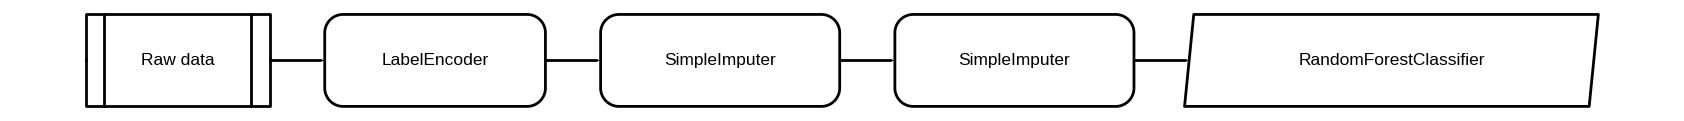

In [ ]:
# PRINT THE FINAL PIPELINE
print("\nFinal Pipeline:")
plot_model(final_model, plot='pipeline')

In [ ]:
# Load the Test Dataset
test_url = "https://www.dropbox.com/scl/fi/yqihhgvrzwmr4p00ygwlg/test.csv?rlkey=9brcpbfnf4fr41q0seah1z3fr&st=moq8i5m7&dl=0&raw=1"
df_test = pd.read_csv(test_url, index_col='DateID')

# PREDICT ON TEST SET
predictions = predict_model(final_model, data=df_test)

# EXTRACT PREDICTIONS
submission = predictions[['prediction_label']]
submission.columns = [target_col]

# SAVE PREDICTIONS TO CSV
submission.to_csv('PyCaret_result.csv')

print(submission)

           OutlookTomorrow
DateID                    
fe97c2d8     Mostly Cloudy
be33fd88     Mostly Cloudy
824bae96             Clear
6589fc6c  Frigid and Windy
5d837fb0             Rainy
...                    ...
c35ee3f9     Mostly Cloudy
3d1d573a     Mostly Cloudy
338db194             Clear
94221b87     Mostly Cloudy
ec4e6162     Partly Cloudy

[730 rows x 1 columns]


<div class='markdown-google-sans'>

#### <font color=#DE8F07>**🌟　H2O AutoML**
</div>

<img src="https://i.imgur.com/0ksjRyp.png" width=800 />
<img src="https://i.imgur.com/Bs681yn.png" width=800 />

In [ ]:
!pip install h2o -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.3/265.3 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import pandas as pd
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init()

# LOAD TRAINING DATASET
train_url = "https://www.dropbox.com/scl/fi/4uwpw2pldan0xxs2154fr/train.csv?rlkey=rwcpickd2vrls56abenpr1it4&st=4k2oj5x6&dl=0&raw=1"
df_train = pd.read_csv(train_url, index_col='DateID', parse_dates=['DateID'])

# Convert pandas DataFrame to H2O Frame
train = h2o.H2OFrame(df_train)

# SET FEATURE MATRIX & TARGET VARIABLE
target_col = 'OutlookTomorrow'
features = [col for col in train.columns if col != target_col]

# Create and train the H2O AutoML model
aml = H2OAutoML(max_runtime_secs=300,  # 5 minutes
                seed=1,
                sort_metric='F1',
                verbosity='info')

aml.train(x=features, y=target_col, training_frame=train)

# Get the best model
best_model = aml.leader

# Print the model details
print(best_model)


Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.23" 2024-04-16; OpenJDK Runtime Environment (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.23+9-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp6lvplc5n
  JVM stdout: /tmp/tmp6lvplc5n/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp6lvplc5n/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         08 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.4
H2O_cluster_version_age:    15 days
H2O_cluster_name:           H2O_from_python_unknownUser_4j30z8
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54321
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

<ipython-input-3-cdcfdbafb72b>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_train = pd.read_csv(train_url, index_col='DateID', parse_dates=['DateID'])


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
02:59:24.796: Project: AutoML_1_20240725_25924
02:59:24.807: 5-fold cross-validation will be used.
02:59:24.808: Setting stopping tolerance adaptively based on the training frame: 0.036060922298730945
02:59:24.809: Build control seed: 1
02:59:24.812: training frame: Frame key: AutoML_1_20240725_25924_training_Key_Frame__upload_8044a86c87d2c12189c59596823041f0.hex    cols: 33    rows: 769  chunks: 1    size: 175166  checksum: 7383379153683277184
02:59:24.813: validation frame: NULL
02:59:24.816: leaderboard frame: NULL
02:59:24.817: blending frame: NULL
02:59:24.818: response column: OutlookTomorrow
02:59:24.818: fold column: null
02:59:24.818: weights column: null
02:59:24.906: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (6g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, 

OSError: Job with key $03017f00000132d4ffffffff$_a764238caf3c08d8165a0c99545c4475 failed with an exception: water.exceptions.H2OAutoMLException: Aborting AutoML after too many consecutive model failures
stacktrace: 
water.exceptions.H2OAutoMLException: Aborting AutoML after too many consecutive model failures
	at ai.h2o.automl.AutoML.learn(AutoML.java:776)
	at ai.h2o.automl.AutoML.run(AutoML.java:494)
	at ai.h2o.automl.H2OJob$1.compute2(H2OJob.java:33)
	at water.H2O$H2OCountedCompleter.compute(H2O.java:1704)
	at jsr166y.CountedCompleter.exec(CountedCompleter.java:468)
	at jsr166y.ForkJoinTask.doExec(ForkJoinTask.java:263)
	at jsr166y.ForkJoinPool$WorkQueue.runTask(ForkJoinPool.java:976)
	at jsr166y.ForkJoinPool.runWorker(ForkJoinPool.java:1479)
	at jsr166y.ForkJoinWorkerThread.run(ForkJoinWorkerThread.java:104)


In [ ]:
# Load the Test Dataset
test_url = "https://www.dropbox.com/scl/fi/yqihhgvrzwmr4p00ygwlg/test.csv?rlkey=9brcpbfnf4fr41q0seah1z3fr&st=moq8i5m7&dl=0&raw=1"
df_test = pd.read_csv(test_url, index_col='DateID')

# Convert test dataset to H2O Frame
test = h2o.H2OFrame(df_test)

# Predict the test dataset
predictions = best_model.predict(test)

# Convert prediction into pandas DataFrame
submission = predictions.as_data_frame()
submission.index = df_test.index

# Write a CSV file for submission
submission.to_csv('H2O_AutoML_result.csv')

print(submission)

# Shutdown H2O
h2o.cluster().shutdown()

           OutlookTomorrow
DateID                    
fe97c2d8     Mostly Cloudy
be33fd88     Mostly Cloudy
824bae96             Clear
6589fc6c  Frigid and Windy
5d837fb0             Rainy
...                    ...
c35ee3f9     Mostly Cloudy
3d1d573a     Mostly Cloudy
338db194             Clear
94221b87     Mostly Cloudy
ec4e6162     Partly Cloudy

[730 rows x 1 columns]


<div class='markdown-google-sans'>

### **<font color=#DE8F07>🏆　Samy's AutoML Best Choices**
</div>


<img src="https://i.imgur.com/YeNGbT9.png" width=800 />


<img src="https://i.imgur.com/6GYX8a4.png" width=800 />

<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 15-3**
</div>

Train the following model using AutoML framework BlueCast. No need to test the data. (It might take up to 10 minutes to train)

Observe the output.

In [ ]:
!pip install bluecast -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.5/166.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.9/96.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.9 MB/s eta 0:00:00


2024-09-19 05:31:56,264 - root - INFO - BlueCast blueprint initialized.
2024-09-19 05:31:56,265 - root - INFO - Start detecting and casting feature types.
2024-09-19 05:31:56,269 - root - INFO - Dropped the following columns as being Nulls only: [].
2024-09-19 05:31:56,271 - root - INFO - Dropped the following columns as being Nulls only: [].
2024-09-19 05:31:56,275 - root - INFO - Dropped the following columns as constants only: [].
2024-09-19 05:31:56,277 - root - INFO - Dropped the following columns as constants only: [].
2024-09-19 05:31:56,286 - root - WARNING - /usr/local/lib/python3.10/dist-packages/bluecast/blueprints/cast.py:294: UserWarning: Feature selection is disabled. Update the TrainingConfig param 'enable_feature_selection'
            to enable it or make use of a custom preprocessor to do it manually during the last mile computations step.
            Feature selection is recommended for datasets with many features (>1000). For datasets with a small amount
           

2024-09-19 05:31:57,007 - root - WARNING - GPU-related warning captured: [<warnings.WarningMessage object at 0x7a1e81277fd0>]
2024-09-19 05:31:57,012 - root - WARNING - GPU settings applied but GPU-related warning detected: {'tree_method': 'gpu_hist'}
2024-09-19 05:31:57,016 - root - INFO - No GPU detected. Xgboost will use CPU with parameters: {'tree_method': 'hist'}
2024-09-19 05:31:57,018 - root - INFO - Hyperparameter tuning using random seed 33
2024-09-19 05:31:57,022 - root - WARNING - /usr/local/lib/python3.10/dist-packages/optuna/_experimental.py:30: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.


  0%|          | 0/200 [00:00<?, ?it/s]

2024-09-19 05:33:38,255 - root - INFO - New best score: 0.49262078791856767 from random seed  33
2024-09-19 05:33:38,259 - root - INFO - Best params: {'validate_parameters': False, 'objective': 'multi:softprob', 'booster': 'gbtree', 'eval_metric': 'mlogloss', 'num_class': 2, 'max_depth': 7, 'alpha': 0.026895059430851784, 'lambda': 4.3043560550396895, 'gamma': 2.7099851241856594e-05, 'min_child_weight': 2.8126744364920757, 'subsample': 1.0, 'colsample_bytree': 0.6195931943972546, 'colsample_bylevel': 0.5850157466019097, 'eta': 0.21420618540427808, 'steps': 486, 'tree_method': 'approx', 'grow_policy': 'depthwise', 'max_bin': 917}
2024-09-19 05:33:38,264 - root - INFO - Start final model training
2024-09-19 05:33:38,265 - root - INFO - Union train and test data for final model training based on TrainingConfig
             param 'use_full_data_for_final_model'
2024-09-19 05:33:38,329 - root - INFO - Finished training


Best params: {'validate_parameters': False, 'objective': 'multi:softprob', 'booster': 'gbtree', 'eval_metric': 'mlogloss', 'num_class': 2, 'max_depth': 7, 'alpha': 0.026895059430851784, 'lambda': 4.3043560550396895, 'gamma': 2.7099851241856594e-05, 'min_child_weight': 2.8126744364920757, 'subsample': 1.0, 'colsample_bytree': 0.6195931943972546, 'colsample_bylevel': 0.5850157466019097, 'eta': 0.21420618540427808, 'steps': 486, 'tree_method': 'approx', 'grow_policy': 'depthwise', 'max_bin': 917}
Finished hyperparameter tuning


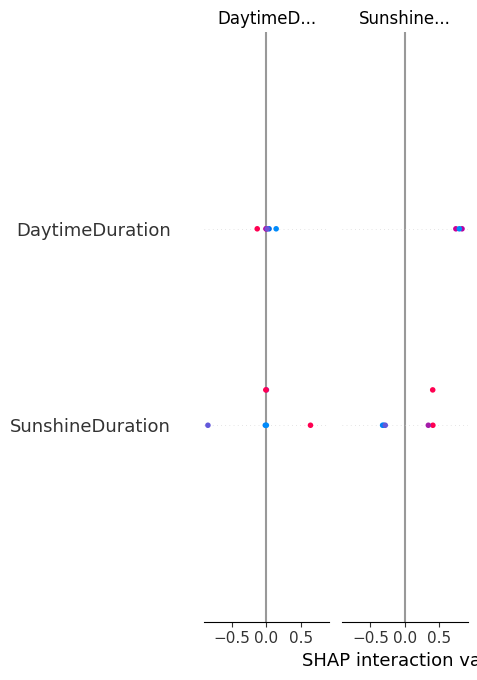

2024-09-19 05:33:38,755 - root - INFO - Plotting interactions of most important features by global SHAP values...


In [ ]:
import pandas as pd
import numpy as np
from bluecast.blueprints.cast import BlueCast

# LOAD TRAINING DATASET
practice_dataset_url = "https://www.dropbox.com/scl/fi/p0n2vdwbve761sfoxrgf3/golf_dataset_mini_with_testset_practice.csv?rlkey=1r1mw6w9fhtxwijejbns1yknt&dl=0&raw=1"
df_train = pd.read_csv(practice_dataset_url)
target_col = 'Play'

# Create and train the BlueCast model
automl = BlueCast(class_problem="binary")

# Fit the model
automl.fit(df_train, target_col=target_col)
